#### Lipid class analysis 
1. [Pearson correlation and t-test](#1)
2. [Random forests feature selection between OC and non-OC samples](#2)
3. [Random forests selection for early OC vs. non-OC](#3)
4. [Volcano plots for early-stage OC vs. non-OC](#4)
5. [Random forests for advanced OC vs. non-OC](#5)
6. [Features common between early OC vs. non-OC and late OC vs. non-OC](#6)

#### Machine learning lipid panel 
1. [ML workflow](#7)
2. [Classification metrics training data](#8)
3. [Test set classification metrics](#9)
4. [Early OC samples vs. non-OC classification](#10)
5. [Normal controls vs. OC classification](#11)
6. [Imbalanced training set classification](#12)

In [1]:
cd C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca

C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style

plt.style.use('ggplot')
import scipy

import seaborn as sns; sns.set(style='white')

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

sns.set_context('talk', font_scale=0.8)
import statsmodels as sms
from statsmodels.stats import multitest
from statistics import mean


In [9]:
#import dataframe with OC and non-oc samples and all annotated features
df = pd.read_excel("without braca.xlsx", sheet_name ='Sheet1')
df.head()

,sample,class,feat1Car(10:0)_P2,feat2Car(12:0)_P3,feat3Car(12:1)_P4,feat4Car(13:0)_P5,feat5Car(13:1)_P6,feat6Car(14:0)_P7,feat7Car(14:2)_P8,feat8Car(16:0)_P9,...,feat992SM(d44:2) M + CH3COOH,feat993SM(t38:0)_or_SM(d38:0-OH) M + CH3COOH,feat994SM(t39:0)_or_SM(d39:0-OH) M + CH3COOH,feat995SM(t40:0)_or_SM(d40:0-OH) M + CH3COOH,feat996SM(t42:0)_or_SM(d42:0-OH) M + CH3COOH,feat997SM(t42:1)_or_SM(d42:1-OH) M + CH3COOH,feat998sphingosine-1P (C18),feat999Sulfatide(d34:1),feat1000Sulfatide(d34:1-OH),feat1001Sulfatide(d43:3)
0,OC32,OC,1.157422e+06,724697.993109,1.281846e+06,165010.576312,125693.374782,7.328623e+05,7.387485e+05,7.209609e+06,...,6.534286e+05,3.729807e+06,2.902377e+07,1.033814e+06,315028.244867,3.480894e+06,8.608665e+05,659882.986375,897736.231590,103907.118059
1,OC156,OC,5.969056e+05,417723.617404,7.748266e+05,47544.127970,57743.052774,5.053407e+05,6.702851e+05,3.648539e+06,...,2.128734e+06,3.058426e+06,1.959117e+07,8.508443e+05,211147.082395,4.492330e+06,4.685311e+05,367650.641518,517451.218096,151038.738152
2,OC157,OC,6.786985e+05,302157.157133,5.270656e+05,300657.785252,165414.422871,5.896516e+05,3.724603e+05,5.732673e+06,...,2.528060e+06,3.595453e+06,3.666925e+07,1.292588e+06,234515.546981,5.296167e+06,8.452217e+05,342706.773802,573166.088648,312529.964756
3,OC40,OC,2.090656e+06,943143.358378,1.205950e+06,481469.502240,314582.072853,1.060877e+06,1.035758e+06,6.926954e+06,...,4.910143e+05,6.077822e+05,1.261128e+06,1.200567e+05,19593.210754,6.057511e+05,2.448383e+06,59883.498847,66437.108791,61751.042629
4,OC179,OC,7.075526e+05,615714.046507,8.531861e+05,338465.052591,182647.114269,8.356780e+05,1.222933e+06,7.170236e+06,...,2.727174e+06,3.080571e+06,1.750061e+07,8.251592e+05,239075.277883,3.781806e+06,6.092676e+05,454095.681399,625454.926486,85111.981233


<a id="1"></a> 
### Pearson Corrleation and t-test

In [ ]:
#reference 

In [11]:
#assign class and features 
other = df[(df['class'] == 'other')]
OC = df[(df['class'] == 'OC')]

#list of features
features = df.drop(['sample','class'],axis = 1).columns

In [12]:
#remove one of the correlated features
correlated_features = set()
correlation_matrix = df[features].astype(float).corr() 

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [7]:
df

,sample,class,feat1Car(10:0)_P2,feat2Car(12:0)_P3,feat3Car(12:1)_P4,feat4Car(13:0)_P5,feat5Car(13:1)_P6,feat6Car(14:0)_P7,feat7Car(14:2)_P8,feat8Car(16:0)_P9,...,feat992SM(d44:2) M + CH3COOH,feat993SM(t38:0)_or_SM(d38:0-OH) M + CH3COOH,feat994SM(t39:0)_or_SM(d39:0-OH) M + CH3COOH,feat995SM(t40:0)_or_SM(d40:0-OH) M + CH3COOH,feat996SM(t42:0)_or_SM(d42:0-OH) M + CH3COOH,feat997SM(t42:1)_or_SM(d42:1-OH) M + CH3COOH,feat998sphingosine-1P (C18),feat999Sulfatide(d34:1),feat1000Sulfatide(d34:1-OH),feat1001Sulfatide(d43:3)
0,OC32,OC,1.157422e+06,7.246980e+05,1.281846e+06,1.650106e+05,1.256934e+05,7.328623e+05,7.387485e+05,7.209609e+06,...,6.534286e+05,3.729807e+06,2.902377e+07,1.033814e+06,315028.244867,3.480894e+06,8.608665e+05,659882.986375,8.977362e+05,103907.118059
1,OC156,OC,5.969056e+05,4.177236e+05,7.748266e+05,4.754413e+04,5.774305e+04,5.053407e+05,6.702851e+05,3.648539e+06,...,2.128734e+06,3.058426e+06,1.959117e+07,8.508443e+05,211147.082395,4.492330e+06,4.685311e+05,367650.641518,5.174512e+05,151038.738152
2,OC157,OC,6.786985e+05,3.021572e+05,5.270656e+05,3.006578e+05,1.654144e+05,5.896516e+05,3.724603e+05,5.732673e+06,...,2.528060e+06,3.595453e+06,3.666925e+07,1.292588e+06,234515.546981,5.296167e+06,8.452217e+05,342706.773802,5.731661e+05,312529.964756
3,OC40,OC,2.090656e+06,9.431434e+05,1.205950e+06,4.814695e+05,3.145821e+05,1.060877e+06,1.035758e+06,6.926954e+06,...,4.910143e+05,6.077822e+05,1.261128e+06,1.200567e+05,19593.210754,6.057511e+05,2.448383e+06,59883.498847,6.643711e+04,61751.042629
4,OC179,OC,7.075526e+05,6.157140e+05,8.531861e+05,3.384651e+05,1.826471e+05,8.356780e+05,1.222933e+06,7.170236e+06,...,2.727174e+06,3.080571e+06,1.750061e+07,8.251592e+05,239075.277883,3.781806e+06,6.092676e+05,454095.681399,6.254549e+05,85111.981233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,BOT34,other,1.280271e+06,5.303596e+05,8.241857e+05,1.297372e+06,4.153085e+05,6.268786e+05,6.073450e+05,6.587548e+06,...,2.559136e+06,3.942126e+06,2.275027e+07,1.037400e+06,388737.423271,5.796924e+06,1.240118e+06,371976.225433,5.624701e+05,239232.810651
321,BOT33,other,1.309852e+06,7.086781e+05,1.056216e+06,1.809892e+06,6.596177e+05,1.132859e+06,6.011845e+05,6.658579e+06,...,2.583249e+06,4.039577e+06,1.944462e+07,9.796753e+05,379199.998171,4.731791e+06,1.564954e+06,408776.070866,5.388798e+05,156812.375886
322,BOT31,other,1.767172e+06,1.316902e+06,1.482332e+06,2.599505e+06,1.861625e+06,5.331479e+05,1.427880e+06,2.798133e+06,...,3.256394e+06,3.795375e+06,1.330673e+07,7.337620e+05,321030.147822,4.731090e+06,1.048700e+06,370623.609885,4.062839e+05,180349.779699
323,BOT59,other,3.422547e+06,1.462599e+06,3.712876e+06,2.014778e+06,8.994478e+05,1.223594e+06,2.593164e+06,6.472930e+06,...,1.927346e+06,3.713311e+06,2.588025e+07,1.058679e+06,371060.097738,6.312935e+06,1.366762e+06,735020.048733,1.270724e+06,279617.866008


In [13]:
corr_feat = df[features].drop(correlated_features, axis=1)
corr_feat.astype(float);

In [15]:
#list of features after removing correlated features 
corr_feat_list = corr_feat.columns
len(corr_feat_list)

789

In [16]:
feature_scaled = (corr_feat-corr_feat.mean(axis=0))/corr_feat.std(axis=0)
feature_scaled.astype(float);

Ttest with all samples 

In [17]:
def Ttest(metabolites, dfControl, dfTreat, alpha=0.05, var=True):
    ttest_dict = {}
    for metabolite in metabolites:
        statistic, pvalue =  scipy.stats.ttest_ind(dfControl[metabolite], 
                                               dfTreat[metabolite], 
                                               equal_var=var)
        ttest_dict[metabolite] = pvalue 
       
    ttest = pd.DataFrame.from_dict(ttest_dict, orient='index') # the dictionary in pandas df
    ttest_list=list(ttest_dict.values()) #pvalues of ttest result in a list
    reject, pval_corrected, _, _ = sms.stats.multitest.multipletests(ttest_list, 
                                                                 alpha=alpha, 
                                                                 method='fdr_bh')
    ttest_results = pd.DataFrame({'Annotation': metabolites, 'T-test p-value': ttest_list, 
                              'FDR p-value': pval_corrected, 'Reject H0': reject})
    Table = ttest_results.sort_values(by=['Annotation'])
    return Table

In [18]:
ttest = Ttest(corr_feat_list, other, OC, alpha=0.05, var = True)
stat_sig_RF = ttest.loc[ttest['FDR p-value'] <=0.05]

sig_list = stat_sig_RF['Annotation'].tolist()
len(sig_list)


218

In [39]:
dfgrp_RF = df.filter(['class'], axis=1)
dfgroup_RF = dfgrp_RF['class'].map({'other': 0, 'OC': 1})
x=feature_scaled # df of autoscaled 789 features after Pearson corr for all 325 samples 
y= dfgroup_RF.values # class array


In [88]:
stat_sig_df = x[stat_sig_RF['Annotation'].values]

stat_sig_df; #df of atuscaled features after ttest

<a id="2"></a>
### Select from model random forests feature selection 

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [45]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100,
                                                 random_state=42))
sel.fit(stat_sig_df, y)
    
#sel.get_support().sum() #number of features selected 
    
selected_feat_RF = stat_sig_df.columns[(sel.get_support())] #features list of RF selected features

print('Number of selected features:',sel.get_support().sum())

Number of selected features: 100


In [46]:
RF_features = stat_sig_df[selected_feat_RF] #df of RF selected features autoscaled 
RF_features_unscaled = df[selected_feat_RF]

Fold changes

In [52]:
def FC(features):
    
    mean = pd.DataFrame({'Annotation': features,
                        'other_mean': other[features].mean(axis = 0), 
                        'OC_mean': OC[features].mean(axis = 0)}).reset_index(drop=True)
    
    foldchange = [np.log2(oc/other) for oc, other in zip(mean['OC_mean'], mean['other_mean'])]
    
    fc_df = pd.DataFrame(list(zip(mean['Annotation'],
                                 foldchange)),
                        columns= ['Annotation','Log2_FC'])
    table = fc_df.sort_values(by=['Annotation'])
    
    return table

In [54]:
Foldchnages_RF = FC(selected_feat_RF) #Fold changes for RF selected features 
fc_all = FC(sig_list) #Fold changes for all stat sig features 


In [57]:
fc_all.head(3)

,Annotation,Log2_FC
0,feat101DG(38:4)>DG(18:0_20:4_0:0) M + H - H2O_...,0.144366
1,feat106Hex2Cer(d42:1)>Hex2Cer(d18:1/24:0)_P107,-0.112878
2,feat119HexCer(d38:1)>HexCer(d18:1/20:0)_P120,-0.193845


In [3]:
cd C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca\autoscaled\RF features lipid class

C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca\autoscaled\RF features lipid class


#### Foldchange barplot for 100 selected features

In [5]:
plot_RF = pd.read_excel('foldchanges_p-val_RFfeatures.xlsx', sheet_name = 'Sheet1')

plot_RF.head()

,Annotation,Log2_FC,group,color
0,feat32Cer(d34:1)>Cer(d18:1/16:0)_P33,0.291916,Cer,"'palevioletred',"
1,feat33Cer(d34:2)>Cer(d18:1/16:1)_M+H-H2O_P34,0.302137,Cer,"'palevioletred',"
2,feat34Cer(d36:1)>Cer(d18:0/18:1)_P35,0.568003,Cer,"'palevioletred',"
3,feat46Cer(d41:2)>Cer(d18:2/23:0)_P47,0.224486,Cer,"'palevioletred',"
4,feat51Cer(d42:2-OH)>HexCer(d18:1/24:1-OH)_P52,0.106969,Cer,"'palevioletred',"


In [6]:
# custom palette 
c = ['palevioletred',
'palevioletred',
'palevioletred',
'palevioletred',
'palevioletred',
'palevioletred',
'palevioletred',
'palevioletred',
'palevioletred',
'palevioletred',
'palevioletred',
'salmon',
'goldenrod',
'goldenrod',
'y',
'olive',
'olive',
'olivedrab',
'olivedrab',
'olivedrab',
'olivedrab',
'olivedrab',
'mediumseagreen',
'lightseagreen',
'lightseagreen',
'lightseagreen',
'lightseagreen',
'lightseagreen',
'lightseagreen',
'lightseagreen',
'lightseagreen',
'lightseagreen',
'lightseagreen',
'lightseagreen',
'lightseagreen',
'lightseagreen',
'lightseagreen',
'lightseagreen',
'lightseagreen',
'lightseagreen',
'lightseagreen',
'lightseagreen',
'lightseagreen',
'lightseagreen',
'lightseagreen',
'teal',
'teal',
'teal',
'teal',
'teal',
'teal',
'teal',
'teal',
'teal',
'teal',
'teal',
'teal',
'teal',
'teal',
'cornflowerblue',
'cornflowerblue',
'mediumslateblue',
'mediumslateblue',
'mediumslateblue',
'mediumslateblue',
'mediumslateblue',
'mediumslateblue',
'mediumslateblue',
'mediumslateblue',
'mediumslateblue',
'mediumslateblue',
'mediumslateblue',
'mediumslateblue',
'plum',
'palevioletred',
'palevioletred',
'salmon',
'goldenrod',
'goldenrod',
'goldenrod',
'y',
'olive',
'olive',
'olive',
'olive',
'olive',
'olive',
'olive',
'olive',
'olive',
'olive',
'olive',
'olive',
'olive',
'olive',
'olive',
'olive',
'olive',
'olive',
'olive']

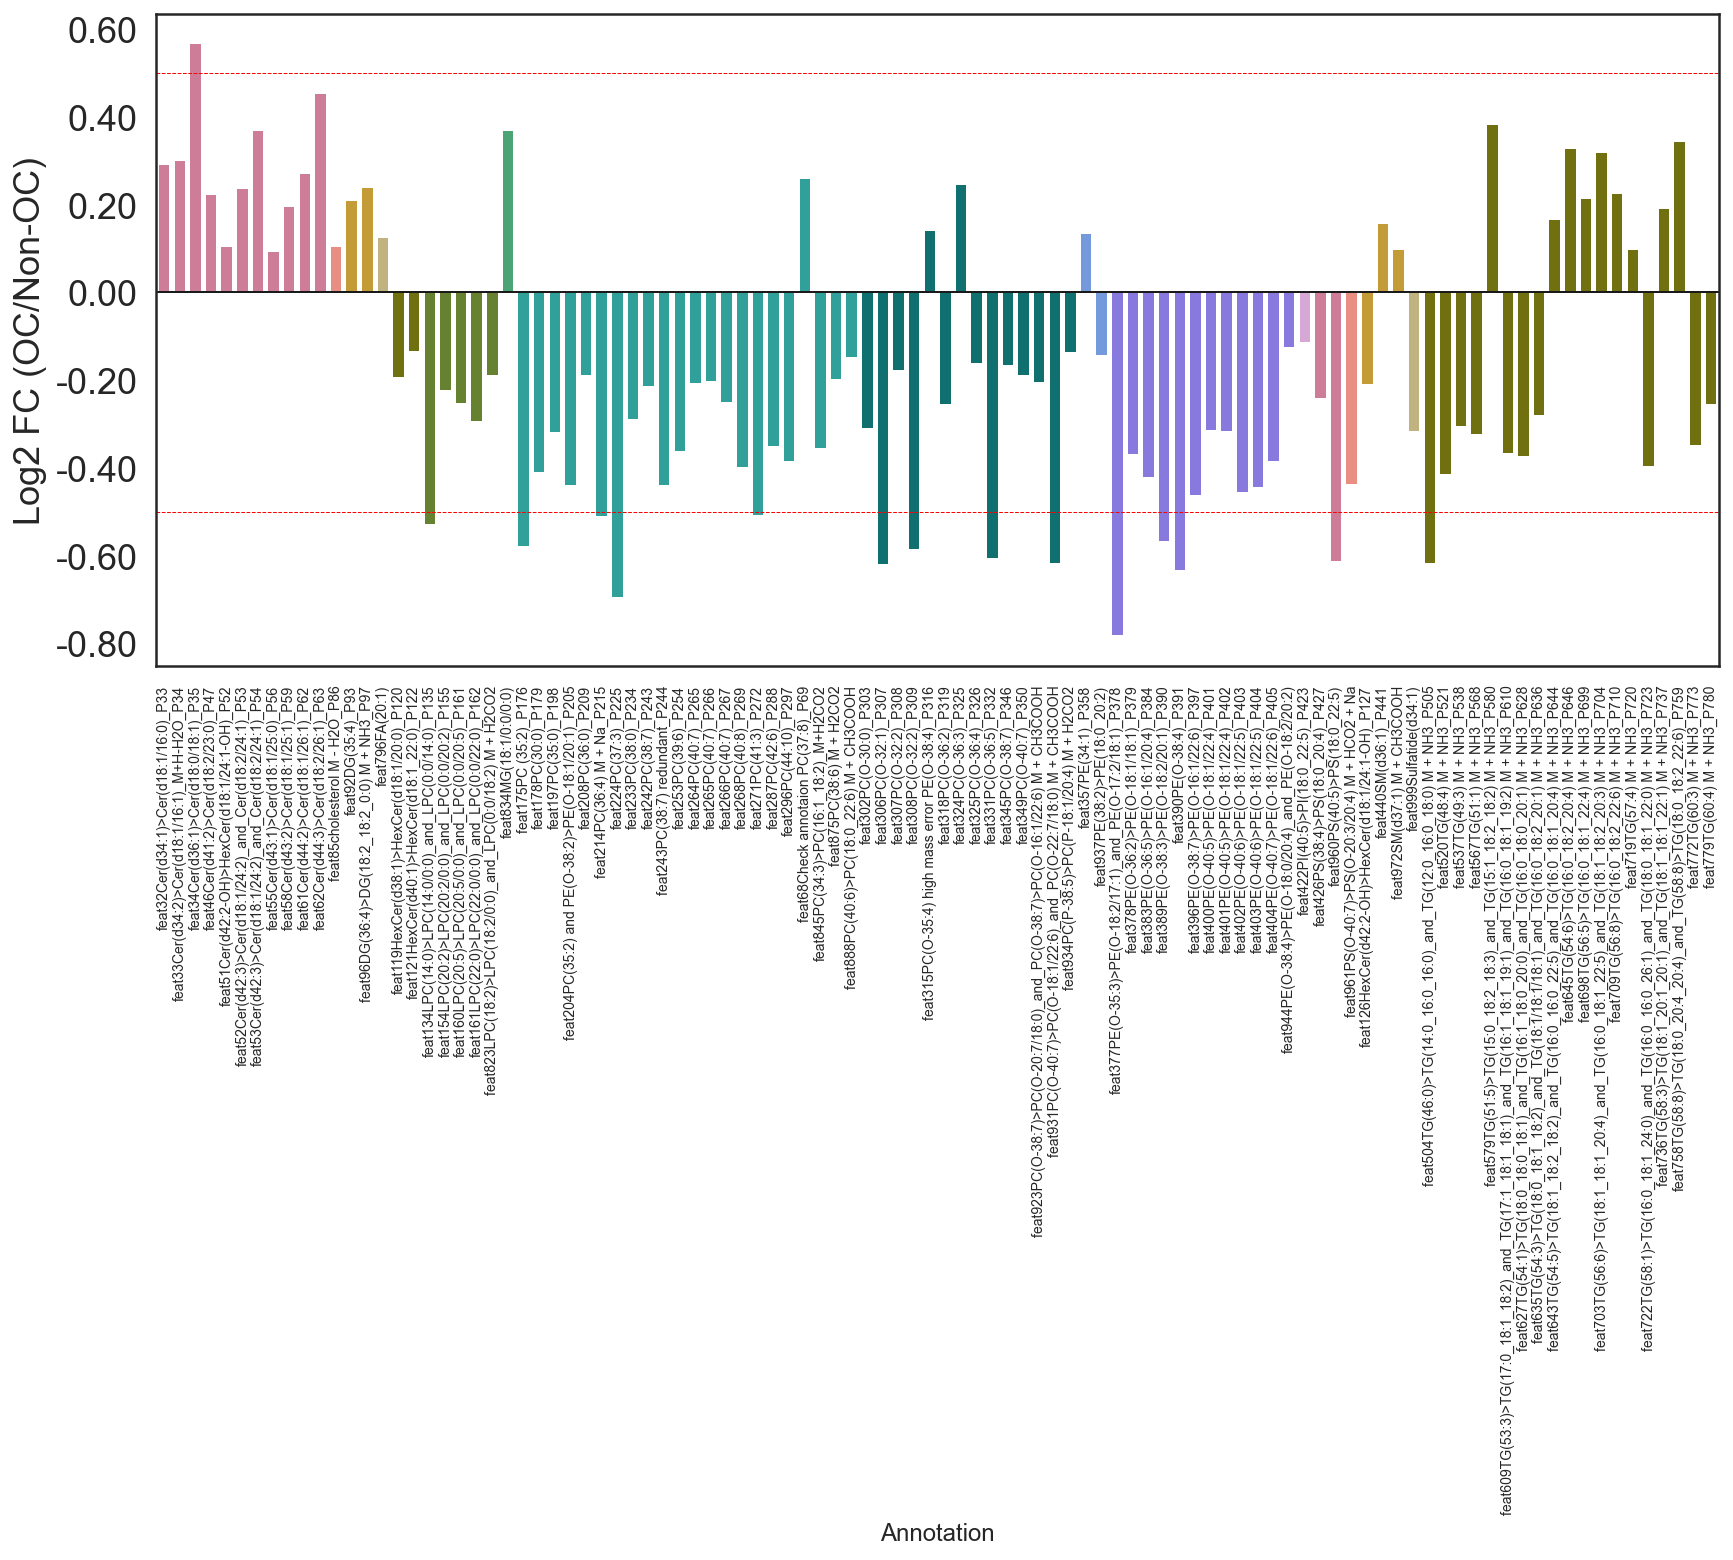

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.ticker import FormatStrFormatter
#sns.set(rc = {'figure.figsize':(18,8)})
fig = plt.figure(figsize=(14, 6))
sns.set(style='white')

plot = sns.barplot(y= 'Log2_FC', x= 'Annotation', data = plot_RF, palette = c)

#plot.set_xlabel('Lipids', fontsize = 15)
plot.set_ylabel('Log2 FC (OC/Non-OC)', fontsize = 18)


plt.axhline(0, lw =1, c ='k')
plt.axhline(0.5, lw =0.5, c ='red', linestyle = 'dashed')
plt.axhline(-0.5, lw =0.5, c ='red', linestyle = 'dashed')
#plot.set_yticklabels(plot.get_yticks(), size = 15)
plot.set_yticklabels(plot.get_yticks(), size = 18)
plot.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plot.set_xticklabels(plot.get_xticklabels(), rotation=90, size =7)
plt.savefig('barplot_RFfeatures_all_edit_3_24_dimension.svg')

#fig.tight_layout()
plot;

<a id="3"></a>
### Early stage Random Forests selection 

In [70]:
cd C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca\autoscaled

C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca\autoscaled


In [71]:
df_early = pd.read_excel('Early and advanced samples.xlsx', sheet_name = 'early')
# df with early OC samples, non-OC samples and 300 statistically sig features between OC vs. non-OC 

In [72]:
other_early  = df_early[(df_early['class'] == 'other')]
OC_early  = df_early[(df_early['class'] == 'OC')]

features_early_list= df_early.drop(['class','sample'], axis =1).columns  #get columns with feature names 
features_early= df_early[features_early_list]

features_early = (features_early-features_early.mean(axis=0))/features_early.std(axis=0)
features_early.astype(float);

In [96]:
dfgrp_early_RF = df_early.filter(['class'], axis=1)
dfgroup_RF_early = dfgrp_early_RF['class'].map({'other': 0, 'OC': 1})
x_early_RF = features_early
y_early_RF= dfgroup_RF_early.values


x_early_RF = x_early_RF.drop(columns=['group'])
x_early_RF;

In [94]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100,
                                                 random_state=42))
sel.fit(x_early_RF, y_early_RF)
    
#sel.get_support().sum() #number of features selected 
    
selected_feat_RF_early = x_early_RF.columns[(sel.get_support())]

print('Number of selected features:',sel.get_support().sum())

Number of selected features: 120


In [95]:
def FC_early(features):
    
    mean = pd.DataFrame({'Annotation': features,
                        'other_mean': other_early[features].mean(axis = 0), 
                        'OC_mean': OC_early[features].mean(axis = 0)}).reset_index(drop=True)
    
    foldchange = [np.log2(oc/other) for oc, other in zip(mean['OC_mean'], mean['other_mean'])]
    
    fc_df = pd.DataFrame(list(zip(mean['Annotation'],
                                 foldchange)),
                        columns= ['Annotation','Log2_FC'])
    table = fc_df.sort_values(by=['Annotation'])
    
    return table

In [99]:
#fold changes for 120 features selcted for early OC vs. non-OC 
Fc_early = FC_early(selected_feat_RF_early)
#p-values for 120 features selected for early OC 
ttest_early = Ttest(selected_feat_RF_early, other_early, OC_early, alpha=0.05, var = True)

#### Early serous OC vs. non-OC 

In [100]:
cd C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca\autoscaled

C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca\autoscaled


In [101]:
df_serous = pd.read_excel('Early and advanced samples.xlsx', sheet_name = 'early serous')

In [102]:
other_serous  = df_serous[(df_serous['group'] == 'other')]
OC_serous  = df_serous[(df_serous['group'] == 'OC')]

features_serous_list= df_serous.drop(['group','sample'], axis =1).columns  #get columns with feature names 
features_serous= df_serous[features_serous_list]

#features_serous = (features_serous-features_serous.mean(axis=0))/features_serous.std(axis=0)
features_serous.astype(float);

In [103]:
def FC_serous(features):
    
    mean = pd.DataFrame({'Annotation': features,
                        'other_mean': other_serous[features].mean(axis = 0), 
                        'OC_mean': OC_serous[features].mean(axis = 0)}).reset_index(drop=True)
    
    foldchange = [np.log2(oc/other) for oc, other in zip(mean['OC_mean'], mean['other_mean'])]
    
    fc_df = pd.DataFrame(list(zip(mean['Annotation'],
                                 foldchange)),
                        columns= ['Annotation','Log2_FC'])
    table = fc_df.sort_values(by=['Annotation'])
    
    return table

In [105]:
#foldchanges and p-val for early serous samples 

serous = FC_serous(selected_feat_RF_early)
ttest_serous = Ttest(selected_feat_RF_early, other_serous, OC_serous, alpha=0.05, var = True)

<a id="4"></a>
### Volcano plots 

In [12]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [13]:
cd C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca\autoscaled\RF features lipid class\vol plot data

C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca\autoscaled\RF features lipid class\vol plot data


#### Early stage volcano plot

In [37]:
vol_early = pd.read_excel('p-val_early_RF.xlsx')
vol_early.head()

,class,Annotation,class.1,T-test p-value,FDR p-value,Reject H0,Log2_FC_early
0,Car,feat19Car(21:2)_P20,Car,0.001415,0.007384,True,-0.270499
1,Cer,feat32Cer(d34:1)>Cer(d18:1/16:0)_P33,Cer,0.008884,0.022683,True,0.145452
2,Cer,feat33Cer(d34:2)>Cer(d18:1/16:1)_M+H-H2O_P34,Cer,0.022235,0.039990,True,0.166664
3,Cer,feat47Cer(d42:1)>Cer(d18:0/24:1)_P48,Cer,0.563140,0.588403,False,0.069647
4,Cer,feat51Cer(d42:2-OH)>HexCer(d18:1/24:1-OH)_P52,Cer,0.277131,0.302325,False,0.062328


In [38]:
vol_early['negative_log_pval'] = np.log10(vol_early['T-test p-value']) * (-1)

car = vol_early[vol_early['class'] == 'Car']
cer = vol_early[vol_early['class'] == 'Cer']
HexCer = vol_early[vol_early['class'] == 'Hex']
LPC = vol_early[vol_early['class'] == 'LPC']
MG = vol_early[vol_early['class'] == 'MG']
PC = vol_early[vol_early['class'] == 'PC']
PC_O = vol_early[vol_early['class'] == 'PC O-']
#PC_P = vol_early[vol_early['class'] == 'PC P-']
PE =  vol_early[vol_early['class'] == 'PE']
PE_O = vol_early[vol_early['class'] == 'PE O-']
PG = vol_early[vol_early['class'] == 'PG']
PI = vol_early[vol_early['class'] == 'PI']
PS = vol_early[vol_early['class'] == 'PS']
SM =  vol_early[vol_early['class'] == 'SM']
TG =  vol_early[vol_early['class'] == 'TG']

In [39]:
fig = go.Figure()

trace1 = go.Scatter(
 x=car['Log2_FC_early'],
 y=car['negative_log_pval'],
 mode='markers',
 name='Car',
 hovertext=list(vol_early.index),
 marker_color ='darkred', 
 marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace2 = go.Scatter(
 x=cer['Log2_FC_early'],
 y=cer['negative_log_pval'],
 mode='markers',
 name='Cer',
 hovertext=list(vol_early.index),
 marker_color ='orange', 
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace3 = go.Scatter(
 x=HexCer['Log2_FC_early'],
 y=HexCer['negative_log_pval'],
 mode='markers',
 name='HexCer',
 hovertext=list(vol_early.index),
 marker_color = 'crimson',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace4 = go.Scatter(
 x=LPC['Log2_FC_early'],
 y=LPC['negative_log_pval'],
 mode='markers',
 name='LPC',
 hovertext=list(vol_early.index),
 marker_color = 'rgb(158,185,243)',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace5 = go.Scatter(
 x=MG['Log2_FC_early'],
 y=MG['negative_log_pval'],
 mode='markers',
 name='MG',
 hovertext=list(vol_early.index),
 marker_color = 'rgb(255,255,51)',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace6 = go.Scatter(
 x=PC['Log2_FC_early'],
 y=PC['negative_log_pval'],
 mode='markers',
 name='PC',
 hovertext=list(vol_early.index),
 marker_color =  '#1C8356',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace7 = go.Scatter(
 x=PC_O['Log2_FC_early'],
 y=PC_O['negative_log_pval'],
 mode='markers',
 name='PC O-',
 hovertext=list(vol_early.index),
 marker_color = '#16FF32',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

#trace8 = go.Scatter(
 #x=PC_P['Log2_FC_early'],
 #y=PC_P['negative_log_pval'],
 #mode='markers',
 #name='PC P-',
 #hovertext=list(vol_early.index),
 #marker_color = '#511CFB',
    #marker_line = dict(width =1, color ='DarkSlateGrey')
#)

trace9 = go.Scatter(
 x=PE['Log2_FC_early'],
 y=PE['negative_log_pval'],
 mode='markers',
 name='PE',
 hovertext=list(vol_early.index),
 marker_color = 'deepskyblue',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace10 = go.Scatter(
 x=PE_O['Log2_FC_early'],
 y=PE_O['negative_log_pval'],
 mode='markers',
 name='PE O-',
 hovertext=list(vol_early.index),
 marker_color = 'darkkhaki',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)


trace11 = go.Scatter(
 x=PG['Log2_FC_early'],
 y=PG['negative_log_pval'],
 mode='markers',
 name='PG',
 hovertext=list(vol_early.index),
     marker_color = '#6C4516',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace12 = go.Scatter(
 x=PI['Log2_FC_early'],
 y=PI['negative_log_pval'],
 mode='markers',
 name='PI',
 hovertext=list(vol_early.index),
    marker_color = 'black',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace13 = go.Scatter(
 x=PS['Log2_FC_early'],
 y=PS['negative_log_pval'],
 mode='markers',
 name='PS',
 hovertext=list(vol_early.index),
    marker_color = '#FE00CE',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace14 = go.Scatter(
 x=SM['Log2_FC_early'],
 y=SM['negative_log_pval'],
 mode='markers',
 name='SM',
 hovertext=list(vol_early.index), 
    marker_color = 'mediumpurple',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace15 = go.Scatter(
 x=TG['Log2_FC_early'],
 y=TG['negative_log_pval'],
 mode='markers',
 name='TG',
 hovertext=list(vol_early.index),
    marker_color = 'lightgrey',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)
fig.add_trace(trace4)
fig.add_trace(trace5)
fig.add_trace(trace6)
fig.add_trace(trace7)
#fig.add_trace(trace8)
fig.add_trace(trace9)
fig.add_trace(trace10)
fig.add_trace(trace11)
fig.add_trace(trace12)
fig.add_trace(trace13)
fig.add_trace(trace14)
fig.add_trace(trace15)


fig.update_layout(title='Early stage OC vs Non OC', title_x = 0.5,paper_bgcolor = 'rgba(0,0,0,0)', plot_bgcolor = 'rgba(0, 0, 0, 0)', autosize = False)
fig.update_yaxes(title ='-log10(p-val)', ticks ='outside', linewidth = 1, linecolor ='black')
fig.update_xaxes(title =' log2 Fold Change', ticks ='outside', linewidth = 1, linecolor ='black' )
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='grey')
fig.add_hline(y=1.3, line_width = 0.9, line_color = 'grey', line_dash = 'dash')
fig.add_vline(x=0.5, line_width = 0.9, line_color = 'grey', line_dash = 'dash')
fig.add_vline(x=-0.5, line_width = 0.9, line_color = 'grey', line_dash = 'dash')
fig.update_traces(marker_size=12)
fig.update_layout(legend_font_size= 13)
fig.update_layout(font_size=16, font_color ='black')

   
#save_location = 'C:/Users/ssah9/Downloads/updated files/figures/volcano_early.svg'
#save_location = 'C:/Users/samyu/9_20_22 data/updated files 9_27_22/figures/volcano_early.svg'
#save_location = ('C:/Users/samyu/9_20_22 data/updated files 9_27_22/autoscaled training and test set/wo braca/autoscaled/RF features lipid class/vol plot data/figure volcano/vol_early.svg')
#fig.write_image(save_location)
fig.show();


#### Serous early stage volcano plot

In [21]:
vol_serous = pd.read_excel('Fc_ttest_serous.xlsx', sheet_name = 'Sheet1')
vol_serous.head()

,class,Annotation,T-test p-value,FDR p-value,Reject H0,Log2_FC
0,Car,feat19Car(21:2)_P20,0.027414,0.258038,False,-0.290729
1,Cer,feat32Cer(d34:1)>Cer(d18:1/16:0)_P33,0.682209,0.843969,False,0.032719
2,Cer,feat33Cer(d34:2)>Cer(d18:1/16:1)_M+H-H2O_P34,0.816737,0.899160,False,0.027182
3,Cer,feat47Cer(d42:1)>Cer(d18:0/24:1)_P48,0.703219,0.857062,False,0.058274
4,Cer,feat51Cer(d42:2-OH)>HexCer(d18:1/24:1-OH)_P52,0.255337,0.494177,False,0.092543


In [22]:
vol_serous['negative_log_pval'] = np.log10(vol_serous['T-test p-value']) * (-1)

car = vol_serous[vol_serous['class'] == 'Car']
cer = vol_serous[vol_serous['class'] == 'Cer']
HexCer = vol_serous[vol_serous['class'] == 'Hex']
LPC = vol_serous[vol_serous['class'] == 'LPC']
MG = vol_serous[vol_serous['class'] == 'MG']
PC = vol_serous[vol_serous['class'] == 'PC']
PC_O = vol_serous[vol_serous['class'] == 'PC O-']
#PC_P = vol_serous[vol_serous['class'] == 'PC P-']
PE =  vol_serous[vol_serous['class'] == 'PE']
PE_O = vol_serous[vol_serous['class'] == 'PE O-']
PG = vol_serous[vol_serous['class'] == 'PG']
PI = vol_serous[vol_serous['class'] == 'PI']
PS = vol_serous[vol_serous['class'] == 'PS']
SM =  vol_serous[vol_serous['class'] == 'SM']
TG =  vol_serous[vol_serous['class'] == 'TG']

In [25]:
fig = go.Figure()

trace1 = go.Scatter(
 x=car['Log2_FC'],
 y=car['negative_log_pval'],
 mode='markers',
 name='Car',
 hovertext=list(vol_serous.index),
 marker_color ='darkred', 
 marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace2 = go.Scatter(
 x=cer['Log2_FC'],
 y=cer['negative_log_pval'],
 mode='markers',
 name='Cer',
 hovertext=list(vol_serous.index),
 marker_color ='orange', 
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace3 = go.Scatter(
 x=HexCer['Log2_FC'],
 y=HexCer['negative_log_pval'],
 mode='markers',
 name='HexCer',
 hovertext=list(vol_serous.index),
 marker_color = 'crimson',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace4 = go.Scatter(
 x=LPC['Log2_FC'],
 y=LPC['negative_log_pval'],
 mode='markers',
 name='LPC',
 hovertext=list(vol_serous.index),
 marker_color = 'rgb(158,185,243)',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace5 = go.Scatter(
 x=MG['Log2_FC'],
 y=MG['negative_log_pval'],
 mode='markers',
 name='MG',
 hovertext=list(vol_serous.index),
 marker_color = 'rgb(255,255,51)',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace6 = go.Scatter(
 x=PC['Log2_FC'],
 y=PC['negative_log_pval'],
 mode='markers',
 name='PC',
 hovertext=list(vol_serous.index),
 marker_color =  '#1C8356',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace7 = go.Scatter(
 x=PC_O['Log2_FC'],
 y=PC_O['negative_log_pval'],
 mode='markers',
 name='PC O-',
 hovertext=list(vol_serous.index),
 marker_color = '#16FF32',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

#trace8 = go.Scatter(
# x=PC_P['Log2_FC'],
 #y=PC_P['negative_log_pval'],
# mode='markers',
 #name='PC P-',
 #hovertext=list(vol_serous.index),
 #marker_color = '#511CFB',
    #marker_line = dict(width =1, color ='DarkSlateGrey')
#)

trace9 = go.Scatter(
 x=PE['Log2_FC'],
 y=PE['negative_log_pval'],
 mode='markers',
 name='PE',
 hovertext=list(vol_serous.index),
 marker_color = 'deepskyblue',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace10 = go.Scatter(
 x=PE_O['Log2_FC'],
 y=PE_O['negative_log_pval'],
 mode='markers',
 name='PE O-',
 hovertext=list(vol_serous.index),
 marker_color = 'darkkhaki',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)


trace11 = go.Scatter(
 x=PG['Log2_FC'],
 y=PG['negative_log_pval'],
 mode='markers',
 name='PG',
 hovertext=list(vol_serous.index),
     marker_color = '#6C4516',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace12 = go.Scatter(
 x=PI['Log2_FC'],
 y=PI['negative_log_pval'],
 mode='markers',
 name='PI',
 hovertext=list(vol_serous.index),
    marker_color = 'black',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace13 = go.Scatter(
 x=PS['Log2_FC'],
 y=PS['negative_log_pval'],
 mode='markers',
 name='PS',
 hovertext=list(vol_serous.index),
    marker_color = '#FE00CE',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace14 = go.Scatter(
 x=SM['Log2_FC'],
 y=SM['negative_log_pval'],
 mode='markers',
 name='SM',
 hovertext=list(vol_serous.index), 
    marker_color = 'mediumpurple',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace15 = go.Scatter(
 x=TG['Log2_FC'],
 y=TG['negative_log_pval'],
 mode='markers',
 name='TG',
 hovertext=list(vol_serous.index),
    marker_color = 'lightgrey',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)
fig.add_trace(trace4)
fig.add_trace(trace5)
fig.add_trace(trace6)
fig.add_trace(trace7)
#fig.add_trace(trace8)
fig.add_trace(trace9)
fig.add_trace(trace10)
fig.add_trace(trace11)
fig.add_trace(trace12)
fig.add_trace(trace13)
fig.add_trace(trace14)
fig.add_trace(trace15)


fig.update_layout(title='Serous OC vs Non OC', title_x = 0.5,paper_bgcolor = 'rgba(0,0,0,0)', plot_bgcolor = 'rgba(0, 0, 0, 0)', autosize = False)
fig.update_yaxes(title ='-log10(p-val)', ticks ='outside', linewidth = 1, linecolor ='black')
fig.update_xaxes(title =' log2 Fold Change', ticks ='outside', linewidth = 1, linecolor ='black' )
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='grey')
fig.add_hline(y=1.3, line_width = 0.9, line_color = 'grey', line_dash = 'dash')
fig.add_vline(x=0.5, line_width = 0.9, line_color = 'grey', line_dash = 'dash')
fig.add_vline(x=-0.5, line_width = 0.9, line_color = 'grey', line_dash = 'dash')
fig.update_traces(marker_size=12)
fig.update_layout(legend_font_size= 13)
fig.update_layout(font_size=16, font_color ='black')

   
#save_location = 'C:/Users/ssah9/Downloads/updated files/figures/volcano_early.svg'
#save_location = 'C:/Users/samyu/9_20_22 data/updated files 9_27_22/figures/volcano_early.svg'
#save_location = 'C:/Users/samyu/9_20_22 data/updated files 9_27_22/autoscaled training and test set/wo braca/autoscaled/Figures/volcano_early.svg'

save_location = ('C:/Users/samyu/9_20_22 data/updated files 9_27_22/autoscaled training and test set/wo braca/autoscaled/RF features lipid class/vol plot data/figure volcano/vol_serous_updated.svg')
fig.write_image(save_location)
fig.show();



<a id="5"></a>
### Advanced stage random forest 

In [114]:
cd C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca\autoscaled

C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca\autoscaled


In [131]:
df_adv = pd.read_excel('Early and advanced samples.xlsx', sheet_name = 'advanced')
df_adv.head();

In [123]:
other_adv  = df_adv[(df_adv['class'] == 'other')]
OC_adv = df_adv[(df_adv['class'] == 'OC')]

features_adv_list= df_adv.drop(['class','sample','group'], axis =1).columns  #get columns with feature names 
features_adv= df_adv[features_adv_list]
features_adv.astype(float)

features_adv_scaled = (features_adv-features_adv.mean(axis=0))/features_adv.std(axis=0)
features_adv_scaled.astype(float);

In [124]:
dfgrp_adv_RF = df_adv.filter(['class'], axis=1)
dfgroup_adv = dfgrp_adv_RF['class'].map({'other': 0, 'OC': 1})
x_adv_RF =features_adv_scaled
y_adv_RF= dfgroup_adv.values

In [127]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100,
                                                 random_state=42))
sel.fit(x_adv_RF, y_adv_RF)
    
#sel.get_support().sum() #number of features selected 
    
selected_feat_RF_adv = x_adv_RF.columns[(sel.get_support())]

print('Number of selected features:',sel.get_support().sum())

Number of selected features: 103


In [128]:
def FC_adv(features):
    
    mean = pd.DataFrame({'Annotation': features,
                        'other_mean': other_adv[features].mean(axis = 0), 
                        'OC_mean': OC_adv[features].mean(axis = 0)}).reset_index(drop=True)
    
    foldchange = [np.log2(oc/other) for oc, other in zip(mean['OC_mean'], mean['other_mean'])]
    
    fc_df = pd.DataFrame(list(zip(mean['Annotation'],
                                 foldchange)),
                        columns= ['Annotation','Log2_FC'])
    table = fc_df.sort_values(by=['Annotation'])
    
    return table

In [130]:
#foldchanges and p-values for advanced stage OC vs. non-OC 

Fc_adv = FC_adv(selected_feat_RF_adv)
ttest_adv = Ttest(selected_feat_RF_adv, other_adv, OC_adv, alpha=0.05, var = True)

In [141]:
#volcano plot for adv vs. non-OC 

In [142]:
cd C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca\autoscaled\RF features lipid class\vol plot data

C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca\autoscaled\RF features lipid class\vol plot data


In [44]:
vol_adv = pd.read_excel('p-val-RF_foldchanges_adv.xlsx')
vol_adv.head(2)

,class,Annotation,T-test p-value,FDR p-value,Reject H0,Log2_FC
0,Car,feat12Car(18:1)_P13,3.410364e-03,4.283750e-03,True,0.160896
1,Cer,feat32Cer(d34:1)>Cer(d18:1/16:0)_P33,2.924853e-11,1.004200e-09,True,0.400366


In [45]:
vol_adv['negative_log_pval_late'] = np.log10(vol_adv['T-test p-value']) * (-1)

car = vol_adv[vol_adv['class'] == 'Car']
cer = vol_adv[vol_adv['class'] == 'Cer']
HexCer = vol_adv[vol_adv['class'] == 'Hex']
chol = vol_adv[vol_adv['class'] == 'CHL']
chol_sul = vol_adv[vol_adv['class'] == 'CHL sulfate']
DG = vol_adv[vol_adv['class'] == 'DG']
FA = vol_adv[vol_adv['class'] == 'FA']
LPC = vol_adv[vol_adv['class'] == 'LPC']

PC = vol_adv[vol_adv['class'] == 'PC']
PC_O = vol_adv[vol_adv['class'] == 'PC O-']
#PC_P = vol_adv[vol_adv['class'] == 'PC P-']
PE =  vol_adv[vol_adv['class'] == 'PE']
PE_O = vol_adv[vol_adv['class'] == 'PE O-']


PI = vol_adv[vol_adv['class'] == 'PI']
PS = vol_adv[vol_adv['class'] == 'PS']
PS_O = vol_adv[vol_adv['class'] == 'PS O-']

SM =  vol_adv[vol_adv['class'] == 'SM']
TG =  vol_adv[vol_adv['class'] == 'TG']

In [49]:
fig = go.Figure()

trace1 = go.Scatter(
 x=car['Log2_FC'],
 y=car['negative_log_pval_late'],
 mode='markers',
 name='Car',
 hovertext=list(vol_adv.index),
 marker_color ='darkred', 
 marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace2 = go.Scatter(
 x=cer['Log2_FC'],
 y=cer['negative_log_pval_late'],
 mode='markers',
 name='Cer',
 hovertext=list(vol_adv.index),
 marker_color ='orange', 
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace3 = go.Scatter(
 x=HexCer['Log2_FC'],
 y=HexCer['negative_log_pval_late'],
 mode='markers',
 name='HexCer',
 hovertext=list(vol_adv.index),
 marker_color = 'crimson',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace4 = go.Scatter(
 x=LPC['Log2_FC'],
 y=LPC['negative_log_pval_late'],
 mode='markers',
 name='LPC',
 hovertext=list(vol_adv.index),
 marker_color = 'rgb(158,185,243)',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace5 = go.Scatter(
 x=DG['Log2_FC'],
 y=DG['negative_log_pval_late'],
 mode='markers',
 name='DG',
 hovertext=list(vol_adv.index),
 marker_color = 'rgb(255,255,51)',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace6 = go.Scatter(
 x=PC['Log2_FC'],
 y=PC['negative_log_pval_late'],
 mode='markers',
 name='PC',
 hovertext=list(vol_adv.index),
 marker_color =  '#1C8356',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace7 = go.Scatter(
 x=PC_O['Log2_FC'],
 y=PC_O['negative_log_pval_late'],
 mode='markers',
 name='PC O-',
 hovertext=list(vol_adv.index),
 marker_color = '#16FF32',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

#trace8 = go.Scatter(
 #x=PC_P['Log2_FC'],
 #y=PC_P['negative_log_pval_late'],
 #mode='markers',
 #name='PC P-',
 #hovertext=list(vol_adv.index),
 #marker_color = '#511CFB',
    #marker_line = dict(width =1, color ='DarkSlateGrey')
#)

trace9 = go.Scatter(
 x=PE['Log2_FC'],
 y=PE['negative_log_pval_late'],
 mode='markers',
 name='PE',
 hovertext=list(vol_adv.index),
 marker_color = 'deepskyblue',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace10 = go.Scatter(
 x=PE_O['Log2_FC'],
 y=PE_O['negative_log_pval_late'],
 mode='markers',
 name='PE O-',
 hovertext=list(vol_adv.index),
 marker_color = 'darkkhaki',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)


trace11 = go.Scatter(
 x=PS_O['Log2_FC'],
 y=PS_O['negative_log_pval_late'],
 mode='markers',
 name='PS O-',
 hovertext=list(vol_adv.index),
     marker_color = '#6C4516',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace12 = go.Scatter(
 x=PI['Log2_FC'],
 y=PI['negative_log_pval_late'],
 mode='markers',
 name='PI',
 hovertext=list(vol_adv.index),
    marker_color = 'black',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace13 = go.Scatter(
 x=PS['Log2_FC'],
 y=PS['negative_log_pval_late'],
 mode='markers',
 name='PS',
 hovertext=list(vol_adv.index),
    marker_color = '#FE00CE',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace14 = go.Scatter(
 x=SM['Log2_FC'],
 y=SM['negative_log_pval_late'],
 mode='markers',
 name='SM',
 hovertext=list(vol_adv.index), 
    marker_color = 'mediumpurple',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace15 = go.Scatter(
 x=TG['Log2_FC'],
 y=TG['negative_log_pval_late'],
 mode='markers',
 name='TG',
 hovertext=list(vol_adv.index),
    marker_color = 'lightgrey',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace16 = go.Scatter(
 x=chol['Log2_FC'],
 y=chol['negative_log_pval_late'],
 mode='markers',
 name='CHL',
 hovertext=list(vol_adv.index),
    marker_color = '#990099',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)


trace17 = go.Scatter(
 x=chol_sul['Log2_FC'],
 y=chol_sul['negative_log_pval_late'],
 mode='markers',
 name='CHL sulfate',
 hovertext=list(vol_adv.index),
    marker_color = 'rgb(255,255,204)',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)

trace18 = go.Scatter(
 x=FA['Log2_FC'],
 y=FA['negative_log_pval_late'],
 mode='markers',
 name='FA',
 hovertext=list(vol_adv.index),
    marker_color = 'rgb(124,124,124)',
    marker_line = dict(width =1, color ='DarkSlateGrey')
)



fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)
fig.add_trace(trace4)
fig.add_trace(trace5)
fig.add_trace(trace6)
fig.add_trace(trace7)
#fig.add_trace(trace8)
fig.add_trace(trace9)
fig.add_trace(trace10)
fig.add_trace(trace11)
fig.add_trace(trace12)
fig.add_trace(trace13)
fig.add_trace(trace14)
fig.add_trace(trace15)
fig.add_trace(trace16)
fig.add_trace(trace17)
fig.add_trace(trace18)





fig.update_layout(title='Late stage OC vs Non OC', title_x = 0.5,paper_bgcolor = 'rgba(0,0,0,0)', plot_bgcolor = 'rgba(0, 0, 0, 0)', autosize = False)
fig.update_yaxes(title ='-log10(p-val)', ticks ='outside', linewidth = 1, linecolor ='black')
fig.update_xaxes(title =' log2 Fold Change', ticks ='outside', linewidth = 1, linecolor ='black' )
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='grey')
fig.add_hline(y=1.3, line_width = 0.9, line_color = 'grey', line_dash = 'dash')
fig.add_vline(x=0.5, line_width = 0.9, line_color = 'grey', line_dash = 'dash')
fig.add_vline(x=-0.5, line_width = 0.9, line_color = 'grey', line_dash = 'dash')
fig.update_traces(marker_size=12)
fig.update_layout(legend_font_size= 13)
fig.update_layout(font_size=16, font_color ='black')

   
#save_location = 'C:/Users/ssah9/Downloads/updated files/figures/volcano_early.svg'
#save_location = 'C:/Users/samyu/9_20_22 data/updated files 9_27_22/figures/volcano_early.svg'
#save_location = 'C:/Users/samyu/9_20_22 data/updated files 9_27_22/autoscaled training and test set/wo braca/autoscaled/Figures/volcano_advanced.svg'

save_location = ('C:/Users/samyu/9_20_22 data/updated files 9_27_22/autoscaled training and test set/wo braca/autoscaled/RF features lipid class/vol plot data/figure volcano/vol_late_updated.svg')
fig.write_image(save_location)


fig.show();

<a id="6"></a>
### Features common between early OC vs. non-OC and late OC vs. non-OC 

In [133]:
selected_feat_RF_early_set = set(selected_feat_RF_early)
common = selected_feat_RF_early_set.intersection(selected_feat_RF_adv)
#pd.DataFrame(common).to_excel(r'C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca\autoscaled\RF features lipid class\common_features.xlsx')

In [137]:
cd C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca\autoscaled\RF features lipid class

C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca\autoscaled\RF features lipid class


In [138]:
common_plot = pd.read_excel('common_features.xlsx')
common_plot.head()

,class,color,Annotation,FC overall,FC early,FC adv
0,Cer,"'palevioletred',",Cer(d18:1/16:0),0.291916,0.145452,0.400366
1,Cer,"'palevioletred',",Cer(d18:1/16:1),0.302137,0.166664,0.403091
2,Cer,"'palevioletred',",Cer(d18:1/24:2) and Cer(d18:2/24:1),0.237086,0.164912,0.292922
3,Cer,"'palevioletred',",Cer(d18:1/25:0),0.095330,0.081477,0.106437
4,Cer,"'palevioletred',",Cer(d18:1/25:1),0.197174,0.150187,0.234085


In [139]:
## custom palette 

cc = ['palevioletred',
'palevioletred',
'palevioletred',
'palevioletred',
'palevioletred',
'palevioletred',
'salmon',
'goldenrod',
'goldenrod',
'goldenrod',
'goldenrod',
'goldenrod',
'goldenrod',
'goldenrod',
'goldenrod',
'goldenrod',
'goldenrod',
'goldenrod',
'y',
'y',
'y',
'y',
'y',
'y',
'y',
'y',
'y',
'y',
'olive',
'olive',
'olive',
'olive',
'olive',
'olive',
'olive',
'olive',
'olive',
'olive',
'olivedrab',
'mediumseagreen',
'mediumseagreen',
'lightseagreen',
'lightseagreen',
'teal',
'teal',
'teal',
'teal',
'teal',
'teal',
'teal',
'teal']

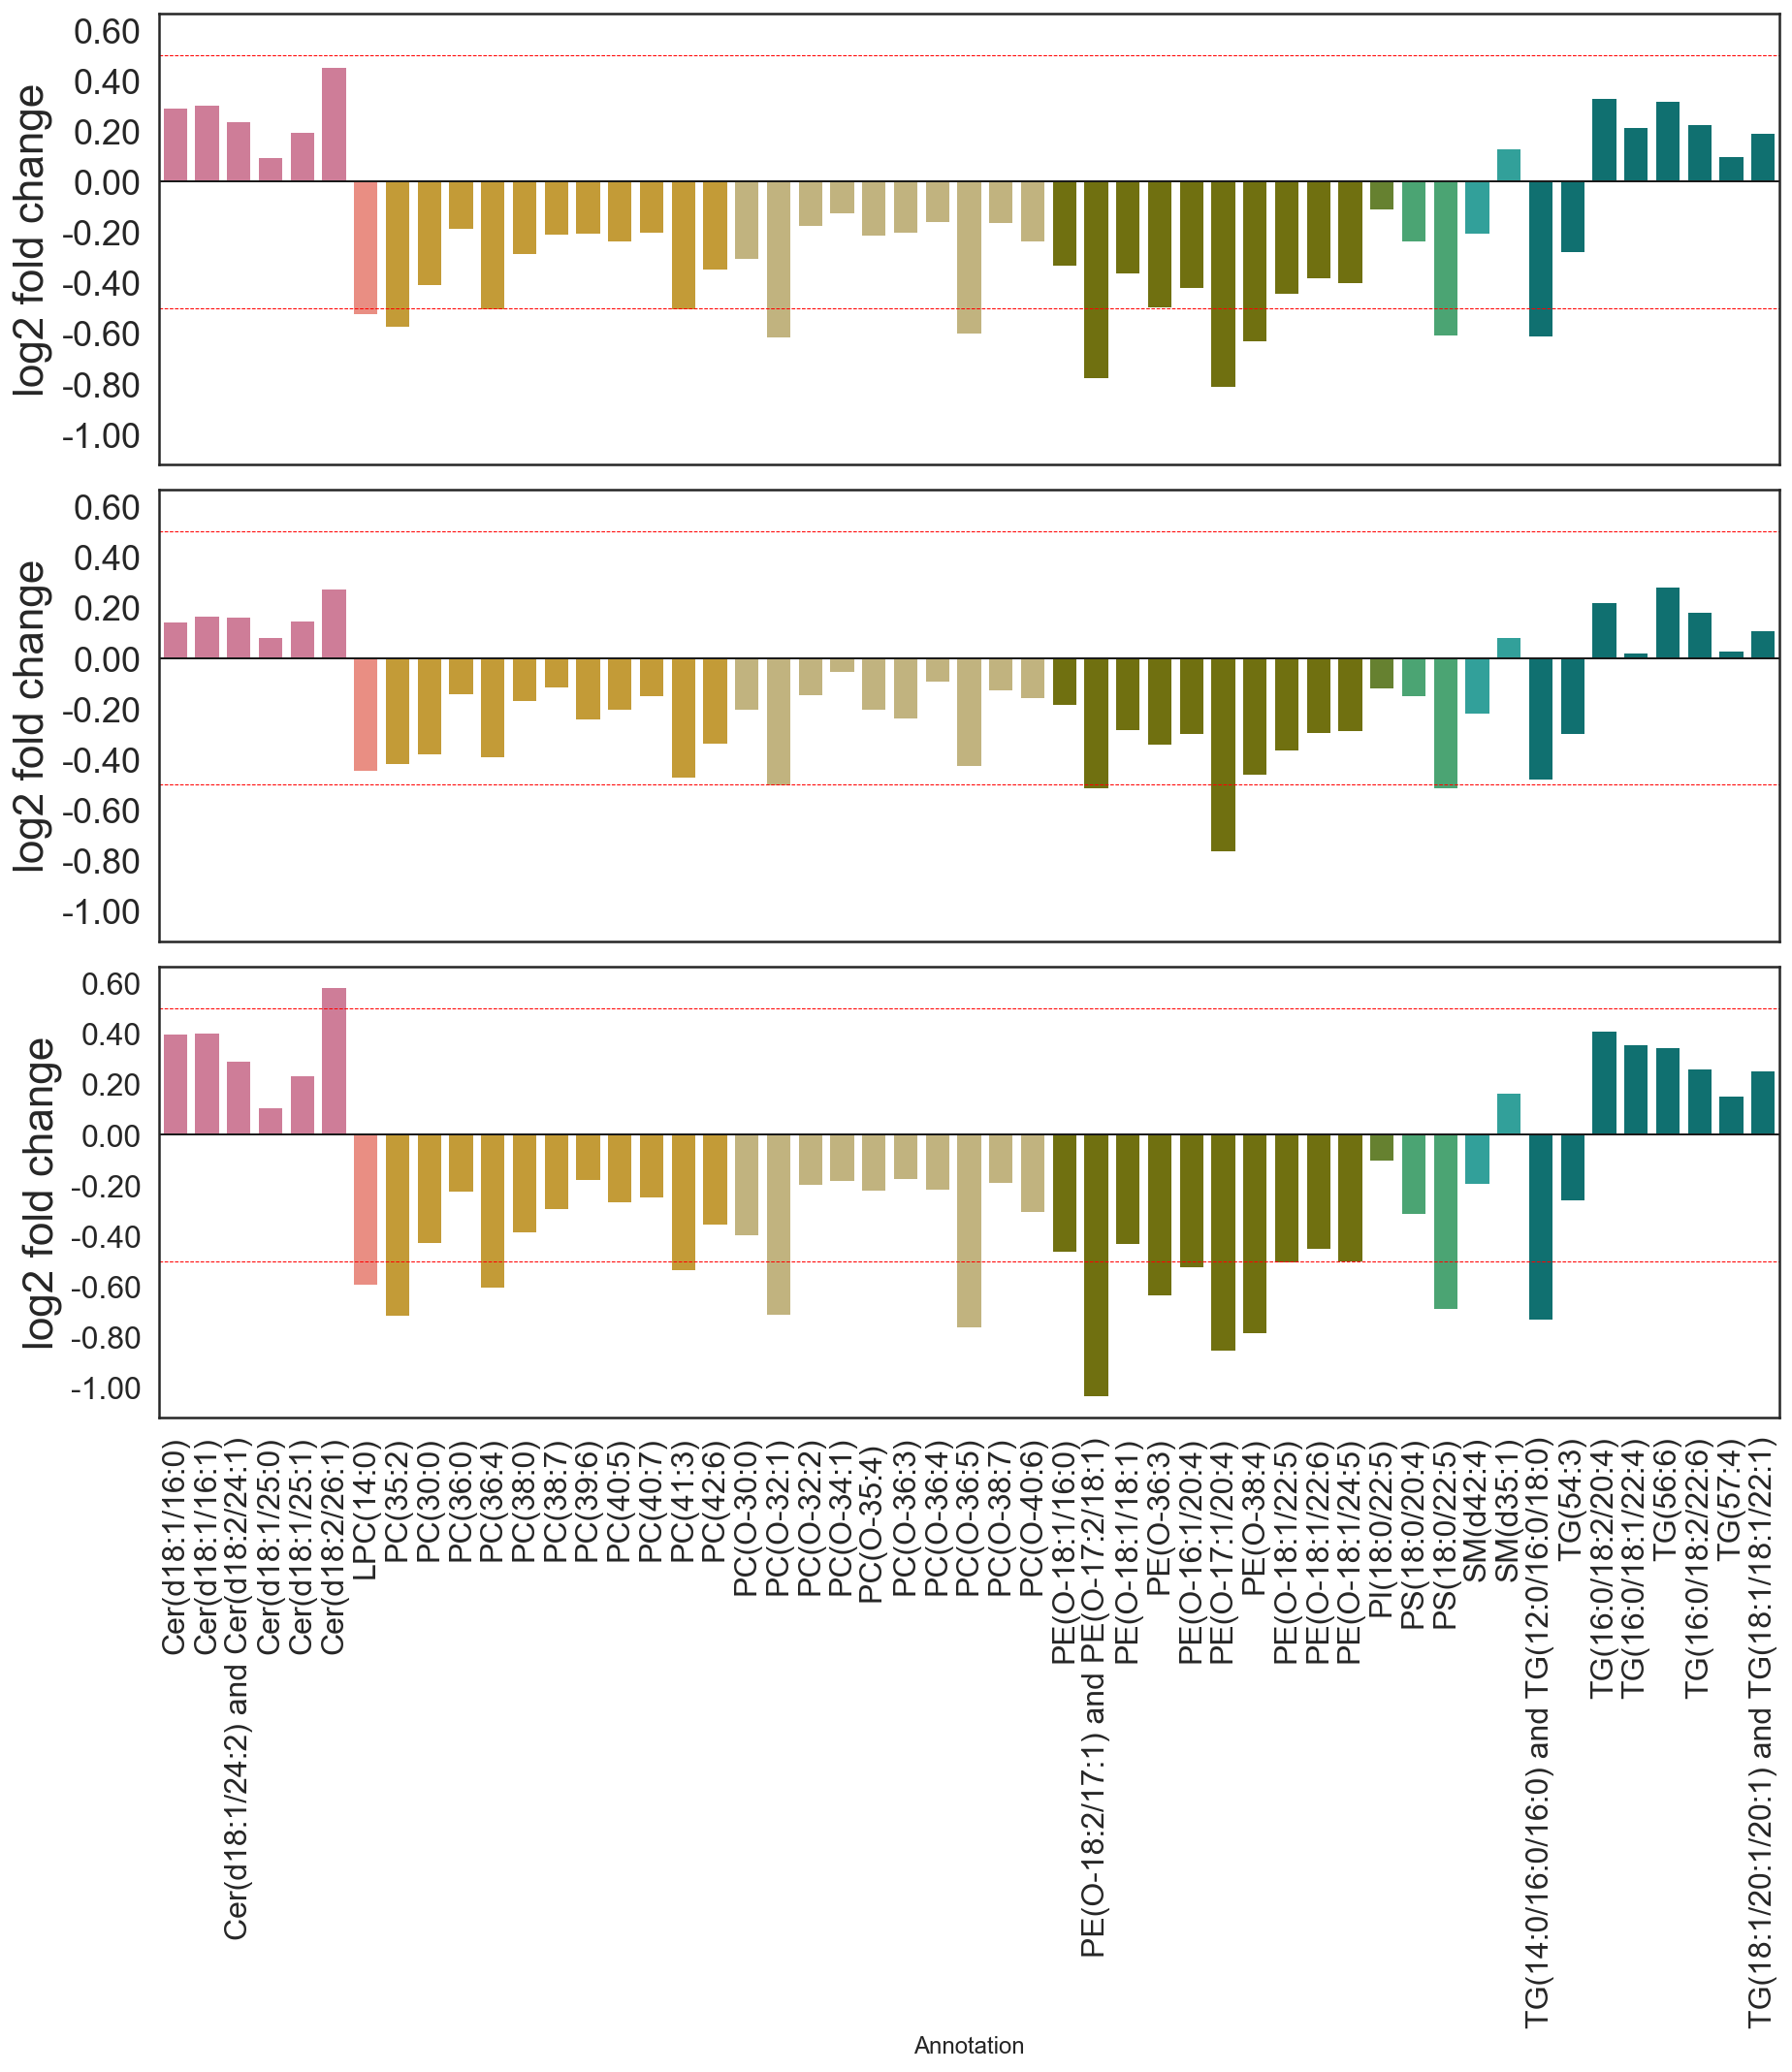

In [140]:
from matplotlib.ticker import FormatStrFormatter

fig, axes = plt.subplots(3, 1, figsize=(13, 15), sharey=True)

#overall 
plot = sns.barplot(ax=axes[0], y= 'FC overall', x= 'Annotation', data = common_plot, palette = cc)
#plot.set_title('OC vs Non OC conditions', fontsize = 22)#, loc = 'left')
plot.set_ylabel('log2 fold change', fontsize = 22)
plot.set(xlabel=None)

plot.axhline(0, lw =1, c ='k')
plot.axhline(0.5, lw =0.5, c ='red', linestyle ='dashed')
plot.axhline(-0.5, lw =0.5, c ='red', linestyle ='dashed')
#plot.set_yticklabels(plot.get_yticks(), size = 15)
#plot.set_xticklabels(plot.get_xticklabels(), rotation=90, size =7)
plot.set_yticklabels(plot.get_yticks(), size = 18)
plot.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plot.set_xticklabels([])

plot


plot_early = sns.barplot(ax=axes[1], y= 'FC early', x= 'Annotation', data = common_plot, palette = cc)
#plot_early.set_title('Early stage OC vs Non OC',fontsize = 22)

plot_early.set_ylabel('log2 fold change', fontsize = 22)
plot_early.set(xlabel=None)
plot_early.axhline(0, lw =1, c ='k')
plot_early.axhline(0.5, lw =0.5, c ='red', linestyle ='dashed')
plot_early.axhline(-0.5, lw =0.5, c ='red', linestyle ='dashed')
plot_early.set_xticklabels([])
plot_early.set_yticklabels(plot_early.get_yticks(), size = 18)
plot_early.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plot_early


plot_ad = sns.barplot(ax=axes[2], y= 'FC adv', x= 'Annotation', data = common_plot, palette = cc)
#plot_ad.set_title('Advanced stage OC vs Non - OC', fontsize = 22)
plot_ad.set_ylabel('log2 fold change', fontsize = 22)
#plot_ad.set_xlabel('Lipids', fontsize = 22)
plot_ad.axhline(0, lw =1, c ='k')
plot_ad.axhline(0.5, lw =0.5, c ='red', linestyle = 'dashed')
plot_ad.axhline(-0.5, lw =0.5, c ='red', linestyle = 'dashed')

#plot.set_yticklabels(plot.get_yticks(), size = 15)
plot_ad.set_xticklabels(plot_ad.get_xticklabels(), rotation=90, size =16)
plot_ad.set_yticklabels(plot_ad.get_yticks(), size = 16)
plot_ad.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


plot_ad
plt.tight_layout()
#plt.savefig('barplot_common_RF.svg')


### Lipid class count plots 

In [40]:
#early stage

table_early = vol_early.groupby(['class'])['class'].count().reset_index(name = 'count')
table_early = table_early.sort_values(by='count', ascending=False)
table_early['Percent'] = (table_early['count']/table_early['count'].sum())*100


table_early


,class,count,Percent
5,PC,32,26.666667
13,TG,21,17.500000
6,PC O-,19,15.833333
8,PE O-,15,12.500000
1,Cer,9,7.500000
3,LPC,6,5.000000
12,SM,5,4.166667
7,PE,3,2.500000
10,PI,3,2.500000
2,Hex,2,1.666667


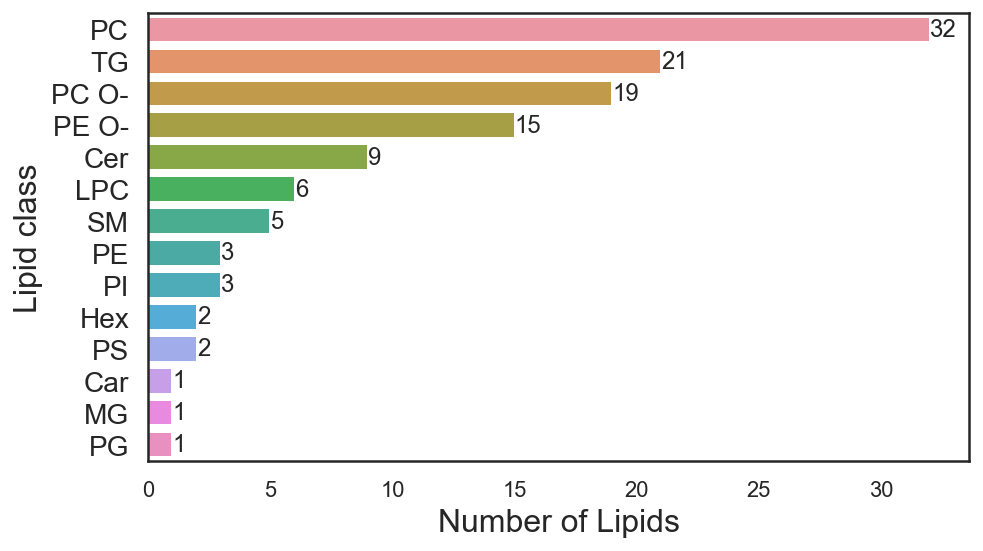

In [42]:
fig, ax = plt.subplots(figsize=(7, 4))
fig = sns.barplot(y="class", x='count',data =table_early)
#fig = plt.fig(figsize=(1, 2))


fig.set_xlabel('Number of Lipids', size = 16)
fig.set_ylabel('Lipid class', size = 16)

fig.set_yticklabels(fig.get_yticklabels(), size =14)
ax.bar_label(ax.containers[0])
#plot_early.set_xticklabels(plot_early.get_xticklabels(), size =15)


plt.tight_layout()
plt.savefig('Early_lipid_family_updated.svg')

In [46]:
#advanced stage

table_ad = vol_adv.groupby(['class'])['class'].count().reset_index(name = 'count')
table_ad = table_ad.sort_values(by='count', ascending=False)
table_ad['Percent'] = (table_ad['count']/table_ad['count'].sum())*100

#table_ad = table_ad.drop(3)
table_ad

,class,count,Percent
8,PC,24,23.300971
9,PC O-,18,17.475728
11,PE O-,15,14.563107
16,TG,15,14.563107
3,Cer,12,11.650485
4,DG,3,2.912621
7,LPC,3,2.912621
15,SM,3,2.912621
13,PS,2,1.941748
5,FA,1,0.970874


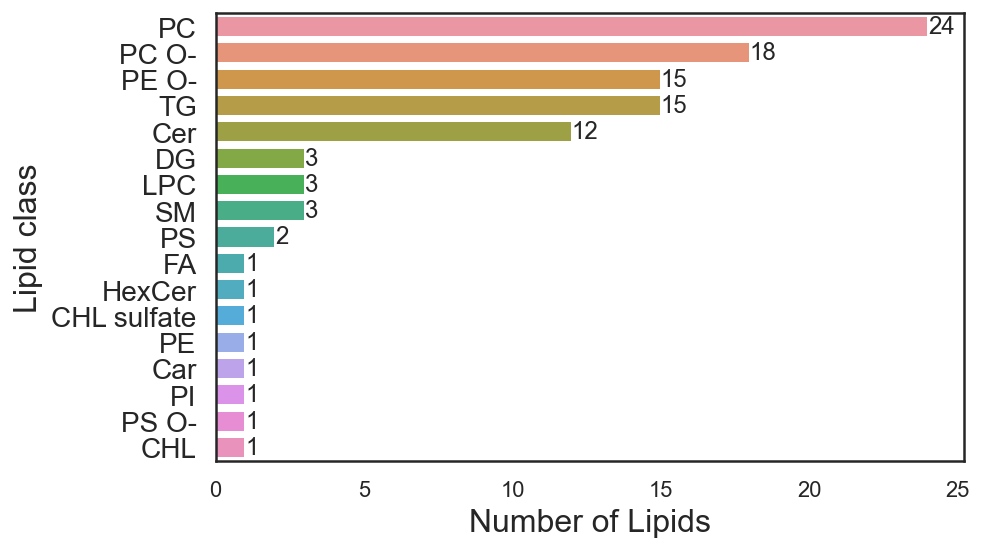

In [48]:
fig, ax = plt.subplots(figsize=(7, 4))
fig = sns.barplot(y="class", x='count',data =table_ad)
#fig = plt.fig(figsize=(1, 2))


fig.set_xlabel('Number of Lipids', size = 16)
fig.set_ylabel('Lipid class', size = 16)

fig.set_yticklabels(fig.get_yticklabels(), size =14)
ax.bar_label(ax.containers[0])
#plot_early.set_xticklabels(plot_early.get_xticklabels(), size =15)


plt.tight_layout()
plt.savefig('Adv_lipid_family_updated.svg')

<a id="7"></a>
### Machine Learning Lipid Panel

In [19]:
cd C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca

C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca


In [20]:
### import training set 
df_train = pd.read_excel('without braca.xlsx', sheet_name  = 'training all features')
df_train.head();

In [21]:
other_train = df_train[(df_train['class'] == 'other')]
OC_train = df_train[(df_train['class'] == 'OC')]

feat_train = df_train.drop(['class','sample'],axis =1)  
#feat_train= df_train[feat_train]   #training data with all features
feat_train_sel = feat_train[corr_feat_list]   #df of training samples with selected after Pearson correlation 



#### Ttest for OC vs. non-OC only with training set 

In [22]:
def Ttest(metabolites, dfControl, dfTreat, alpha=0.05, var=True):
    ttest_dict = {}
    for metabolite in metabolites:
        statistic, pvalue =  scipy.stats.ttest_ind(dfControl[metabolite], 
                                               dfTreat[metabolite], 
                                               equal_var=var)
        ttest_dict[metabolite] = pvalue 
       
    ttest = pd.DataFrame.from_dict(ttest_dict, orient='index') # the dictionary in pandas df
    ttest_list=list(ttest_dict.values()) #pvalues of ttest result in a list
    reject, pval_corrected, _, _ = sms.stats.multitest.multipletests(ttest_list, 
                                                                 alpha=alpha, 
                                                                 method='fdr_bh')
    ttest_results = pd.DataFrame({'Annotation': metabolites, 'T-test p-value': ttest_list, 
                              'FDR p-value': pval_corrected, 'Reject H0': reject})
    Table = ttest_results.sort_values(by=['Annotation'])
    return Table

In [23]:
ttest_train = Ttest(corr_feat_list, other_train, OC_train, alpha=0.05, var = True)
stat_sig = ttest_train.loc[ttest_train['T-test p-value'] <=0.05]

len(stat_sig)

218

In [24]:
stat_sig_feat = stat_sig['Annotation'].tolist()

#### Balance training set with SMOTE

In [25]:
import imblearn
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import scipy
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels as sms
from statsmodels.stats import multitest
from scipy.stats import shapiro
from decimal import Decimal
from statistics import mean
from imblearn.over_sampling import SMOTE

In [16]:

print(imblearn.__version__)

0.9.1


In [26]:
dfgrp = df_train.filter(['class'], axis=1)
dfgroup = dfgrp['class'].map({'other': 0, 'OC': 1})
x=feat_train_sel  #df of training samples with selected after Pearson correlation 
y= dfgroup.values #class as 0 or 1 for other and OC 

x_scaled = (x-x.mean(axis=0))/x.std(axis=0)

In [27]:
sm = SMOTE(random_state=42) 
x_balanced, y_balanced = sm.fit_resample(x, y)

In [28]:

print('Number of non-oc samples',y_balanced.tolist().count(0))
print('OC samples', y_balanced.tolist().count(1))

Number of non-oc samples 144
OC samples 144


In [29]:
#autoscale balanced training set
x_balanaced_scaled = (x_balanced-x_balanced.mean(axis=0))/x_balanced.std(axis=0)  

In [30]:
#dataframe of balanced training set with 218 statistically sig features 
ML_x = x_balanaced_scaled[stat_sig_feat]
ML_x.astype(float);


### Random forest feature selection using balanced training set

In [31]:
import sklearn 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

# Import Random Forest classifier, sklearn metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# test train split and K-fold validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn import decomposition

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [9]:
print(sklearn.__version__)

1.1.2


In [44]:
# reference

In [32]:
# RF function 
def RF_selector(X, y):
    
    """
    Function: A random forest function
    X-Matrix is autoscaled. 
    
    Input: 
    X: X-Matrix
    Y: y matrix
    
    Output:Dataframe containing Gini index. 
    
    """
    
    # Instantiate random forests
    RFclf = RandomForestClassifier(
        n_estimators=100, 
        random_state=42
    )
    
    # Fit random forest
    RFclf.fit(X, y)
    
    # Gini index
    gini = RFclf.feature_importances_
    
    # Zip metabolite name to gini index. 
    list_of_tuples = list(
        zip(X.columns, 
            gini)
    )
    
    # Get dataframe for metabolites and Gini index score.
    df_feat = pd.DataFrame(
        list_of_tuples, 
        columns = ['Annotations', 'Gini_Index']
    )
    
    # Sort the dataframe
    df_feat = df_feat.sort_values(
        by='Gini_Index', 
        ascending=False
    )
    
    return df_feat

In [33]:
# features sorted with importance score (gini index)
RF_features = RF_selector(ML_x, y_balanced)
RF_features

,Annotations,Gini_Index
61,feat287PC(42:6)_P288,0.020216
99,feat389PE(O-38:3)>PE(O-18:2/20:1)_P390,0.017725
1,feat126HexCer(d42:2-OH)>HexCer(d18:1/24:1-OH)_...,0.017028
51,feat268PC(40:8)_P269,0.013594
22,feat191PC(34:2) was PG(36:2)_P192,0.012292
...,...,...
187,feat885PC(40:6)>PC(18:0_22:6) M + H2CO2,0.001024
16,feat166LPC(22:6)>LPC(22:6/0:0)_and_LPC(0:0/22:...,0.001000
41,feat243PC(38:7) redundant_P244,0.000940
156,feat650TG(54:8) M + NH3_P651,0.000665


In [34]:
mean_gini = RF_features['Gini_Index'].mean() 
mean_gini

0.004587155963302753

In [35]:
#Select top 10 features 
RF_features_sel = RF_features['Annotations'][:10].tolist()
RF_features_sel = ML_x[RF_features_sel]
RF_features_sel_list = RF_features_sel.columns
len(RF_features_sel_list)

10

In [49]:
#RF_features_sel.to_excel(r'C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca\10_features_training_balanced.xlsx')
#pd.DataFrame(y_balanced).to_excel(r'C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca\class_balanced.xlsx')

#### Import test set

In [36]:
cd C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca

C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca


In [37]:
df_test = pd.read_excel('without braca.xlsx', sheet_name = 'test_allfeatures')

In [40]:
dfgrp_test = df_test.filter(['group_other'], axis=1)
dfgroup_test = dfgrp_test['group_other'].map({'other': 0, 'OC': 1})

features_test= df_test.drop(['group_other','sample'],axis =1).columns  #get columns with feature names 
features_test= df_test[features_test]
features_test.astype(float);
x_test = features_test
x_test = (x_test- x_test.mean(axis=0))/x_test.std(axis=0) #autoscaled values for PCA
x_test.astype(float);
y_test=dfgroup_test.values

In [41]:
#dataframe of test set with 10 RF selected features

test_biomarkers = x_test[RF_features_sel_list]

<a id="8"></a>
### Machine learning classifiers

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn import model_selection
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
# reference 

In [43]:
def ml_model_2(X, y, model, kfold=10):
    
    '''
    FUNCTION: 
    A  machine learning function under Kfold cross validation conditions - used for training data 
    
    DEPENDENCY: 
    Various Sklearn packages
    from sklearn import metrics
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import KFold
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import roc_auc_score
    
    INPUTS: 
    X = numpy.ndaarray: features
    y = numpy.ndaarray: Labels encoded as 0s and 1s. 
    model = machine learning model
    kfold = numeric. K-fold default is 5. 
    
    OUTPUT: 
    A list containing the following machine learning metrics: 
    Area Under the Curve(AUC), Accuracy (ACC), Precision (PRE), 
    Recall (REC), F1-core (FS), Matthew's Correlation Coefficient (MCC). 
    
    '''

    cv = model_selection.StratifiedKFold(n_splits=kfold, random_state=42, shuffle=True)
    # define 'list' of various metrics
    AUC, ACC, REC, SPE = [], [], [], [] 
    performance = []
    
    for (train, test), i in zip(cv.split(X, y), range(kfold)):
        # training the model
        model.fit(X[train], y[train])
        y_pred = model.predict(X[test])
        
        #Retrieving metrics after testing
        modelprobs = model.predict_proba(X[test])
        fpr, tpr, thresholds = metrics.roc_curve(y[test], modelprobs[:,1])
        roc_auc = auc(fpr, tpr)
        accuracy = metrics.accuracy_score(y[test], y_pred)
        precision = metrics.precision_score(y[test], y_pred)
        recall = metrics.recall_score(y[test], y_pred)
        f1_score = metrics.f1_score(y[test], y_pred)
        mcc = metrics.matthews_corrcoef(y[test], y_pred)
        # coding specificity
        tn, fp, fn, tp = confusion_matrix(y[test], y_pred).ravel()
        specificity = tn / (tn+fp)
        # append metrics to list
        AUC.append(roc_auc)
        ACC.append(accuracy)
        #PRE.append(precision)
        REC.append(recall)
        #FS.append(f1_score)
        #MCC.append(mcc)
        SPE.append(specificity)
    return  (mean(AUC).round(decimals=2), np.std(AUC).round(decimals=2)), (mean(ACC).round(decimals=2), np.std(ACC).round(decimals=2)),  (mean(REC).round(decimals=2), np.std(REC).round(decimals=2)),  (mean(SPE).round(decimals=2), np.std(SPE).round(decimals=2))


In [44]:
RFbase= RandomForestClassifier(random_state=42)
log_clf = LogisticRegression(random_state=42)
knn_clf = KNeighborsClassifier()
svm_clf = svm.SVC(probability=True)

#### Training set classification metrics

In [45]:
metric_RFtrain = ml_model_2(RF_features_sel.to_numpy(), y_balanced, RFbase)
RF_AUC, RF_ACC, RF_REC, RF_SPE = metric_RFtrain[0], metric_RFtrain[1], metric_RFtrain[2], metric_RFtrain[3]

metric_LRtrain = ml_model_2(RF_features_sel.to_numpy(), y_balanced, log_clf)
LR_AUC, LR_ACC, LR_REC, LR_SPE = metric_LRtrain[0], metric_LRtrain[1], metric_LRtrain[2], metric_LRtrain[3]

metric_kNNtrain = ml_model_2(RF_features_sel.to_numpy(), y_balanced, knn_clf)
kNN_AUC, kNN_ACC, kNN_REC, kNN_SPE = metric_kNNtrain[0], metric_kNNtrain[1], metric_kNNtrain[2], metric_kNNtrain[3]


metric_svmtrain = ml_model_2(RF_features_sel.to_numpy(), y_balanced, svm_clf)
svm_AUC, svm_ACC, svm_REC, svm_SPE = metric_svmtrain[0], metric_svmtrain[1], metric_svmtrain[2], metric_svmtrain[3]


vclf = VotingClassifier(
    estimators=[('RF', RFbase),  
                ('lr', log_clf), ('knn', knn_clf), ('svm', svm_clf)],
    voting='soft')

metric_votingtrain = ml_model_2(RF_features_sel.to_numpy(), y_balanced, vclf) 
vclf_AUC, vclf_ACC, vclf_REC,  vclf_SPE = metric_votingtrain[0], metric_votingtrain[1], metric_votingtrain[2], metric_votingtrain[3]

In [46]:
Training = pd.DataFrame({'Random Forest' : metric_RFtrain,'Logistic Regression':(metric_LRtrain),'kNN':(metric_kNNtrain), 'SVM-lin': (metric_svmtrain), 'Voting': (metric_votingtrain)},
                   index = ['AUC','Accuracy','Sensitivity','SPE'])
 
Training 

,Random Forest,Logistic Regression,kNN,SVM-lin,Voting
AUC,"(0.91, 0.06)","(0.8, 0.11)","(0.84, 0.1)","(0.87, 0.08)","(0.9, 0.08)"
Accuracy,"(0.83, 0.08)","(0.72, 0.1)","(0.77, 0.09)","(0.8, 0.07)","(0.81, 0.09)"
Sensitivity,"(0.83, 0.11)","(0.7, 0.17)","(0.63, 0.14)","(0.77, 0.11)","(0.74, 0.15)"
SPE,"(0.83, 0.1)","(0.74, 0.09)","(0.91, 0.06)","(0.83, 0.09)","(0.88, 0.06)"


<a id="9"></a>
### Test set classification metrics

In [56]:
# function for classtion metrics for test set
def ml_model(x_train, y_train, x_test, y_test, model):

    #cv = model_selection.StratifiedKFold(n_splits=kfold, random_state=42, shuffle=True)
    # define 'list' of various metrics
    AUC, ACC, REC, SPE = [], [], [], [] 
    performance = []
    
    
        # training the model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
        #Retrieving metrics after testing
    modelprobs = model.predict_proba(x_test)
    #fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,modelprobs[:,1] )
    roc_auc = auc(fpr, tpr)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    mcc = metrics.matthews_corrcoef(y_test, y_pred)
        # coding specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
        # append metrics to list
    AUC.append(roc_auc)
    ACC.append(accuracy)
        #PRE.append(precision)
    REC.append(recall)
        #FS.append(f1_score)
        #MCC.append(mcc)
    SPE.append(specificity)
    return (mean(AUC).round(decimals=2), np.std(AUC).round(decimals=2)), (mean(ACC).round(decimals=2), np.std(ACC).round(decimals=2)),  (mean(REC).round(decimals=2), np.std(REC).round(decimals=2)),  (mean(SPE).round(decimals=2), np.std(SPE).round(decimals=2))


In [57]:
metric_RFtest = ml_model(RF_features_sel.to_numpy(), y_balanced, x_test[RF_features_sel_list], y_test, RFbase)
RF_AUC, RF_ACC, RF_REC, RF_SPE = metric_RFtest[0], metric_RFtest[1], metric_RFtest[2], metric_RFtest[3]

metric_LRtest = ml_model(RF_features_sel.to_numpy(), y_balanced,x_test[RF_features_sel_list], y_test, log_clf)
LR_AUC, LR_ACC, LR_REC, LR_SPE = metric_LRtest[0], metric_LRtest[1], metric_LRtest[2], metric_LRtest[3]

metric_kNNtest = ml_model(RF_features_sel.to_numpy(), y_balanced, x_test[RF_features_sel_list], y_test, knn_clf)
kNN_AUC, kNN_ACC, kNN_REC, kNN_SPE = metric_kNNtest[0], metric_kNNtest[1], metric_kNNtest[2], metric_kNNtest[3]


metric_svmtest = ml_model(RF_features_sel.to_numpy(), y_balanced, x_test[RF_features_sel_list], y_test, svm_clf)
svm_AUC, svm_ACC, svm_REC, svm_SPE = metric_svmtest[0], metric_svmtest[1], metric_svmtest[2], metric_svmtest[3]


vclf_test = VotingClassifier(
    estimators=[('RF', RFbase),  
                ('lr', log_clf), ('knn', knn_clf), ('svm', svm_clf)],
    voting='soft')

metric_votingtest = ml_model(RF_features_sel.to_numpy(), y_balanced, x_test[RF_features_sel_list], y_test,vclf) 
vclf_test_AUC, vclf_test_ACC, vclf_test_REC,  vclf_test_PE = metric_votingtest[0], metric_votingtest[1], metric_votingtest[2], metric_votingtest[3]

In [58]:
test = pd.DataFrame({'Random Forest' : metric_RFtest,'Logistic Regression':(metric_LRtest),'kNN':(metric_kNNtest), 'SVM-lin': (metric_svmtest), 'Voting': (metric_votingtest)},
                   index = ['AUC','Accuracy','Sensitivity','SPE'])
test  

,Random Forest,Logistic Regression,kNN,SVM-lin,Voting
AUC,"(0.78, 0.0)","(0.71, 0.0)","(0.68, 0.0)","(0.71, 0.0)","(0.74, 0.0)"
Accuracy,"(0.75, 0.0)","(0.65, 0.0)","(0.65, 0.0)","(0.67, 0.0)","(0.72, 0.0)"
Sensitivity,"(0.87, 0.0)","(0.66, 0.0)","(0.55, 0.0)","(0.74, 0.0)","(0.72, 0.0)"
SPE,"(0.62, 0.0)","(0.64, 0.0)","(0.76, 0.0)","(0.6, 0.0)","(0.72, 0.0)"


<a id="10"></a>
### Early test set classification

In [74]:
cd C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca\autoscaled

C:\Users\samyu\9_20_22 data\updated files 9_27_22\autoscaled training and test set\wo braca\autoscaled


In [75]:
#dataframe containig autoscaled early test set samples 
df_early_test = pd.read_excel('autoscaled.xlsx', sheet_name = 'early test')
df_early_test.head(3)

,sample,class,feat1Car(10:0)_P2,feat2Car(12:0)_P3,feat3Car(12:1)_P4,feat4Car(13:0)_P5,feat6Car(14:0)_P7,feat8Car(16:0)_P9,feat9Car(16:1)_P10,feat11Car(18:0)_P12,...,feat989SM(d43:2) M + CH3COOH,feat990SM(d43:2) M + CH3COOH,feat991SM(d43:2) M + CH3COOH,feat992SM(d44:2) M + CH3COOH,feat993SM(t38:0)_or_SM(d38:0-OH) M + CH3COOH,feat994SM(t39:0)_or_SM(d39:0-OH) M + CH3COOH,feat995SM(t40:0)_or_SM(d40:0-OH) M + CH3COOH,feat996SM(t42:0)_or_SM(d42:0-OH) M + CH3COOH,feat998sphingosine-1P (C18),feat999Sulfatide(d34:1)
0,OC40,OC,0.172019,0.233781,-0.159688,-0.597321,0.540372,0.107668,0.545955,0.972404,...,-3.238069,-3.853248,-3.122143,-2.651718,-4.198660,-2.722882,-2.796458,-2.785890,3.177455,-2.070004
1,OC65,OC,-0.171730,0.155015,0.029743,-0.966352,-0.442467,-0.936771,-0.708991,-1.211467,...,-1.276257,-0.228780,-0.034713,-0.583723,0.279535,0.265998,1.092451,-0.544874,-0.657718,-0.349688
2,OC99,OC,2.267775,0.936587,0.162389,-0.144741,0.713829,-0.068191,-0.045088,0.270809,...,-0.439566,-0.147604,1.051767,-0.938277,0.136963,0.200045,0.048093,0.331570,0.790321,-0.424229


In [78]:
dfgrp_early_test = df_early_test.filter(['class'], axis=1)
dfgroup_test_early = dfgrp_early_test['class'].map({'other': 0, 'OC': 1})

features_test_early= df_early_test.drop(['class','sample'],axis =1).columns  #get columns with feature names 
features_test_early= df_early_test[RF_features_sel_list]  #early OC dataframe with 10 selected lipids
features_test.astype(float); 

x_early_test = features_test_early
x_early_test.astype(float);

y_early_test=dfgroup_test_early.values

In [77]:
y_early_test.tolist().count(1)

31

In [79]:
metric_RFtest2 = ml_model(RF_features_sel.to_numpy(), y_balanced, x_early_test, y_early_test, RFbase)
RF_AUC, RF_ACC, RF_REC, RF_SPE = metric_RFtest[0], metric_RFtest[1], metric_RFtest[2], metric_RFtest[3]

metric_LRtest2 = ml_model(RF_features_sel.to_numpy(), y_balanced, x_early_test, y_early_test, log_clf)
LR_AUC, LR_ACC, LR_REC, LR_SPE = metric_LRtest[0], metric_LRtest[1], metric_LRtest[2], metric_LRtest[3]

metric_kNNtest2 = ml_model(RF_features_sel.to_numpy(), y_balanced, x_early_test, y_early_test, knn_clf)
kNN_AUC, kNN_ACC, kNN_REC, kNN_SPE = metric_kNNtest[0], metric_kNNtest[1], metric_kNNtest[2], metric_kNNtest[3]


metric_svmtest2 = ml_model(RF_features_sel.to_numpy(), y_balanced, x_early_test, y_early_test, svm_clf)
svm_AUC, svm_ACC, svm_REC, svm_SPE = metric_svmtest[0], metric_svmtest[1], metric_svmtest[2], metric_svmtest[3]


vclf_test2 = VotingClassifier(
    estimators=[('RF', RFbase),  
                ('lr', log_clf), ('knn', knn_clf), ('svm', svm_clf)],
    voting='soft')

metric_votingtest2 = ml_model(RF_features_sel.to_numpy(), y_balanced, x_early_test, y_early_test,vclf) 
vclf_test_AUC, vclf_test_ACC, vclf_test_REC,  vclf_test_PE = metric_votingtest2[0], metric_votingtest2[1], metric_votingtest2[2], metric_votingtest2[3]

In [80]:
test_early = pd.DataFrame({'Random Forest' : metric_RFtest2,'Logistic Regression':(metric_LRtest2),'kNN':(metric_kNNtest2), 'SVM-lin': (metric_svmtest2), 'Voting': (metric_votingtest2)},
                   index = ['AUC','Accuracy','Sensitivity','SPE'])
test_early  

,Random Forest,Logistic Regression,kNN,SVM-lin,Voting
AUC,"(0.75, 0.0)","(0.67, 0.0)","(0.61, 0.0)","(0.65, 0.0)","(0.7, 0.0)"
Accuracy,"(0.74, 0.0)","(0.64, 0.0)","(0.61, 0.0)","(0.64, 0.0)","(0.7, 0.0)"
Sensitivity,"(0.77, 0.0)","(0.48, 0.0)","(0.42, 0.0)","(0.65, 0.0)","(0.61, 0.0)"
SPE,"(0.7, 0.0)","(0.8, 0.0)","(0.8, 0.0)","(0.63, 0.0)","(0.8, 0.0)"


#### Early serous OC samples 

In [81]:
dfserous = pd.read_excel('autoscaled.xlsx', sheet_name = 'early serous')

In [82]:
dfgrp_serous = dfserous.filter(['class'], axis=1)
dfgroup_serous = dfgrp_serous['class'].map({'other': 0, 'OC': 1})

features_serous= dfserous.drop(['class','sample'],axis =1).columns  #get columns with feature names 
features_serous= dfserous[RF_features_sel_list]
features_serous.astype(float);

x_serous = features_serous
x_serous.astype(float);

y_serous=dfgroup_serous.values



x_serous.shape

(59, 10)

In [83]:
metric_RFtest2 = ml_model(RF_features_sel.to_numpy(), y_balanced, x_serous, y_serous, RFbase)
RF_AUC, RF_ACC, RF_REC, RF_SPE = metric_RFtest[0], metric_RFtest[1], metric_RFtest[2], metric_RFtest[3]

metric_LRtest2 = ml_model(RF_features_sel.to_numpy(), y_balanced, x_serous, y_serous, log_clf)
LR_AUC, LR_ACC, LR_REC, LR_SPE = metric_LRtest[0], metric_LRtest[1], metric_LRtest[2], metric_LRtest[3]

metric_kNNtest2 = ml_model(RF_features_sel.to_numpy(), y_balanced, x_serous, y_serous, knn_clf)
kNN_AUC, kNN_ACC, kNN_REC, kNN_SPE = metric_kNNtest[0], metric_kNNtest[1], metric_kNNtest[2], metric_kNNtest[3]


metric_svmtest2 = ml_model(RF_features_sel.to_numpy(), y_balanced, x_serous, y_serous, svm_clf)
svm_AUC, svm_ACC, svm_REC, svm_SPE = metric_svmtest[0], metric_svmtest[1], metric_svmtest[2], metric_svmtest[3]


vclf_test2 = VotingClassifier(
    estimators=[('RF', RFbase),  
                ('lr', log_clf), ('knn', knn_clf), ('svm', svm_clf)],
    voting='soft')

metric_votingtest2 = ml_model(RF_features_sel.to_numpy(), y_balanced, x_serous, y_serous,vclf) 
vclf_test_AUC, vclf_test_ACC, vclf_test_REC,  vclf_test_PE = metric_votingtest2[0], metric_votingtest2[1], metric_votingtest2[2], metric_votingtest2[3]

In [84]:
test_serous = pd.DataFrame({'Random Forest' : metric_RFtest2,'Logistic Regression':(metric_LRtest2),'kNN':(metric_kNNtest2), 'SVM-lin': (metric_svmtest2), 'Voting': (metric_votingtest2)},
                   index = ['AUC','Accuracy','Sensitivity','SPE'])
test_serous  

,Random Forest,Logistic Regression,kNN,SVM-lin,Voting
AUC,"(0.87, 0.0)","(0.75, 0.0)","(0.72, 0.0)","(0.82, 0.0)","(0.82, 0.0)"
Accuracy,"(0.8, 0.0)","(0.71, 0.0)","(0.64, 0.0)","(0.76, 0.0)","(0.76, 0.0)"
Sensitivity,"(0.71, 0.0)","(0.57, 0.0)","(0.43, 0.0)","(0.68, 0.0)","(0.64, 0.0)"
SPE,"(0.87, 0.0)","(0.84, 0.0)","(0.84, 0.0)","(0.84, 0.0)","(0.87, 0.0)"


<a id="11"></a>
### OC vs. Normal controls 

#### 10 lipid panel metrics

In [85]:
dfnormal = pd.read_excel('autoscaled.xlsx', sheet_name = 'normal')

In [86]:
dfgrp_normal = dfnormal.filter(['group'], axis=1)
dfgroup_normal = dfgrp_normal['group'].map({'normal': 0, 'OC': 1})

features_normal= dfnormal.drop(['group','sample'],axis =1)  #get columns with feature names 

features_normal.astype(float);

x_normal = features_normal


x_normal = (x_normal-x_normal.mean(axis=0))/x_normal.std(axis=0)
x_normal.astype(float);

y_normal=dfgroup_normal.values


In [87]:
metric_RFtest2 = ml_model(RF_features_sel.to_numpy(), y_balanced, x_normal.to_numpy(),y_normal, RFbase)
RF_AUC, RF_ACC, RF_REC, RF_SPE = metric_RFtest[0], metric_RFtest[1], metric_RFtest[2], metric_RFtest[3]

metric_LRtest2 = ml_model(RF_features_sel.to_numpy(), y_balanced, x_normal.to_numpy(), y_normal, log_clf)
LR_AUC, LR_ACC, LR_REC, LR_SPE = metric_LRtest[0], metric_LRtest[1], metric_LRtest[2], metric_LRtest[3]

metric_kNNtest2 = ml_model(RF_features_sel.to_numpy(), y_balanced, x_normal.to_numpy(), y_normal, knn_clf)
kNN_AUC, kNN_ACC, kNN_REC, kNN_SPE = metric_kNNtest[0], metric_kNNtest[1], metric_kNNtest[2], metric_kNNtest[3]


metric_svmtest2 = ml_model(RF_features_sel.to_numpy(), y_balanced, x_normal.to_numpy(), y_normal, svm_clf)
svm_AUC, svm_ACC, svm_REC, svm_SPE = metric_svmtest[0], metric_svmtest[1], metric_svmtest[2], metric_svmtest[3]


vclf_test2 = VotingClassifier(
    estimators=[('RF', RFbase),  
                ('lr', log_clf), ('knn', knn_clf), ('svm', svm_clf)],
    voting='soft')

metric_votingtest2 = ml_model(RF_features_sel.to_numpy(), y_balanced, x_normal.to_numpy(), y_normal,vclf) 
vclf_test_AUC, vclf_test_ACC, vclf_test_REC,  vclf_test_PE = metric_votingtest2[0], metric_votingtest2[1], metric_votingtest2[2], metric_votingtest2[3]

In [89]:
test_normal = pd.DataFrame({'Random Forest' : metric_RFtest2,'Logistic Regression':(metric_LRtest2),'kNN':(metric_kNNtest2), 'SVM-lin': (metric_svmtest2), 'Voting': (metric_votingtest2)},
                   index = ['AUC','Accuracy','Sensitivity','SPE'])
test_normal 

,Random Forest,Logistic Regression,kNN,SVM-lin,Voting
AUC,"(0.87, 0.0)","(0.83, 0.0)","(0.79, 0.0)","(0.74, 0.0)","(0.84, 0.0)"
Accuracy,"(0.79, 0.0)","(0.73, 0.0)","(0.7, 0.0)","(0.67, 0.0)","(0.75, 0.0)"
Sensitivity,"(0.9, 0.0)","(0.72, 0.0)","(0.66, 0.0)","(0.74, 0.0)","(0.76, 0.0)"
SPE,"(0.62, 0.0)","(0.74, 0.0)","(0.76, 0.0)","(0.55, 0.0)","(0.74, 0.0)"


<a id="12"></a>
### Training with imbalanced data 

In [90]:
metric_RFtrain = ml_model_2(x_scaled[RF_features_sel_list].to_numpy(), y, RFbase)
RF_AUC, RF_ACC, RF_REC, RF_SPE = metric_RFtrain[0], metric_RFtrain[1], metric_RFtrain[2], metric_RFtrain[3]

metric_LRtrain = ml_model_2(x_scaled[RF_features_sel_list].to_numpy(), y, log_clf)
LR_AUC, LR_ACC, LR_REC, LR_SPE = metric_LRtrain[0], metric_LRtrain[1], metric_LRtrain[2], metric_LRtrain[3]

metric_kNNtrain = ml_model_2(x_scaled[RF_features_sel_list].to_numpy(), y, knn_clf)
kNN_AUC, kNN_ACC, kNN_REC, kNN_SPE = metric_kNNtrain[0], metric_kNNtrain[1], metric_kNNtrain[2], metric_kNNtrain[3]


metric_svmtrain = ml_model_2(x_scaled[RF_features_sel_list].to_numpy(), y, svm_clf)
svm_AUC, svm_ACC, svm_REC, svm_SPE = metric_svmtrain[0], metric_svmtrain[1], metric_svmtrain[2], metric_svmtrain[3]


vclf = VotingClassifier(
    estimators=[('RF', RFbase),  
                ('lr', log_clf), ('knn', knn_clf), ('svm', svm_clf)],
    voting='soft')

metric_votingtrain = ml_model_2(x_scaled[RF_features_sel_list].to_numpy(), y, vclf) 
vclf_AUC, vclf_ACC, vclf_REC,  vclf_SPE = metric_votingtrain[0], metric_votingtrain[1], metric_votingtrain[2], metric_votingtrain[3]

In [97]:
Training2 = pd.DataFrame({'Random Forest' : metric_RFtrain,'Logistic Regression':(metric_LRtrain),'kNN':(metric_kNNtrain), 'SVM-lin': (metric_svmtrain), 'Voting': (metric_votingtrain)},
                   index = ['AUC','Accuracy','Sensitivity','SPE'])
 
Training2

,Random Forest,Logistic Regression,kNN,SVM-lin,Voting
AUC,"(0.75, 0.1)","(0.77, 0.1)","(0.74, 0.07)","(0.71, 0.1)","(0.77, 0.09)"
Accuracy,"(0.71, 0.06)","(0.72, 0.1)","(0.71, 0.04)","(0.73, 0.08)","(0.76, 0.07)"
Sensitivity,"(0.85, 0.04)","(0.85, 0.09)","(0.78, 0.08)","(0.92, 0.05)","(0.89, 0.05)"
SPE,"(0.41, 0.14)","(0.44, 0.15)","(0.57, 0.09)","(0.33, 0.15)","(0.49, 0.13)"
